# Skyrose Marketing Agency_40197091

In [1]:
#Import libraries
import numpy as np
import pandas as pd
#Graph Plotting
import matplotlib.pyplot as plt
#ACF & PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Agumented Dicky-Fuller Test
from statsmodels.tsa.stattools import adfuller
#Datetime functions for training sets
from datetime import datetime
from datetime import timedelta
from time import time
#ARIMA model
#from statsmodels.tsa.arima.model import ARIMA
#SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Forecasting
from pandas.tseries.offsets import DateOffset
#Auto ARIMA
#!pip install pmdarima
#import pmdarima as auto_arima
from pmdarima.arima import auto_arima

## Methodology:
1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARMA or ARIMA or SARIMA models based on the data
5. Use the model to make predictions

## Loading Dataset

### Reading sheets from Excel file and loading them into required variables

In [2]:
df_emp = pd.read_excel('D:\\Concordia\\INDU 6611 Applied Industrial System Analytics\\Assignments\\Case 2\\Case 2_Data.xlsx',1) 
#employee hours data
df_craftbeer = pd.read_excel('D:\\Concordia\\INDU 6611 Applied Industrial System Analytics\\Assignments\\Case 2\\Case 2_Data.xlsx',2) 
#craftbeer data
df_whiskey = pd.read_excel('D:\\Concordia\\INDU 6611 Applied Industrial System Analytics\\Assignments\\Case 2\\Case 2_Data.xlsx',3) 
#whiskey data
df_whitewine = pd.read_excel('D:\\Concordia\\INDU 6611 Applied Industrial System Analytics\\Assignments\\Case 2\\Case 2_Data.xlsx',4) 
#whitewine data

### Checking whether the data has been successfully uploaded & how it looks like!

In [3]:
df_craftbeer.head()

,Year,Month,Relative Interest
0,2010,1,6
1,2010,2,9
2,2010,3,15
3,2010,4,12
4,2010,5,17


In [4]:
df_whiskey.head()

,Year,Month,Relative Interest
0,2010,1,41
1,2010,2,42
2,2010,3,44
3,2010,4,41
4,2010,5,39


In [5]:
df_whitewine.head()

,Year,Month,Relative Interest
0,2010,1,54
1,2010,2,54
2,2010,3,58
3,2010,4,52
4,2010,5,61


In [6]:
df_emp.head()

,Unnamed: 0,Year: 2015,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,Employee,Cynthia Wright,Stephanie Williams,Raj \nDewan,Chris \nZhou,Nicola Mancini,Days Available,NaN
1,NaN,Position,Vice-president,Creative,Creative,Technical,Technical,NaN,NaN
2,January,Available Hours,168,168,168,168,168,21,NaN
3,NaN,Actual Hours,160,159,159,152,153,NaN,NaN
4,February,Available Hours,160,160,160,160,160,20,NaN


### Data at a glance

In [7]:
#Function for looking data at a glance
def data_glance(series):
    print("Shape of our craftbeer dataset is",series.shape)
    # Result is (n_rows, n_columns)
    
    # Printing gap in between
    print('\n')
    
    # Concise info of all variables in our dataset
    series.info()
    # () is COMPULSORY, if missed, gives another output!!!

In [8]:
data_glance(df_craftbeer)

Shape of our craftbeer dataset is (72, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               72 non-null     int64
 1   Month              72 non-null     int64
 2   Relative Interest  72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [9]:
data_glance(df_whiskey)

Shape of our craftbeer dataset is (72, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               72 non-null     int64
 1   Month              72 non-null     int64
 2   Relative Interest  72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [10]:
data_glance(df_whitewine)

Shape of our craftbeer dataset is (72, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               72 non-null     int64
 1   Month              72 non-null     int64
 2   Relative Interest  72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [11]:
data_glance(df_emp)

Shape of our craftbeer dataset is (26, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12 non-null     object 
 1   Year: 2015  26 non-null     object 
 2   Unnamed: 2  26 non-null     object 
 3   Unnamed: 3  26 non-null     object 
 4   Unnamed: 4  26 non-null     object 
 5   Unnamed: 5  26 non-null     object 
 6   Unnamed: 6  26 non-null     object 
 7   Unnamed: 7  13 non-null     object 
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(1), object(8)
memory usage: 2.0+ KB


## Data Cleanup

### Changing data type of time columns from int to timestamp

In [12]:
for df in (df_craftbeer, df_whiskey, df_whitewine):
    #Getting date from Year & Month
    df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day= 1))
    # Dropping Year & Month columns
    df.drop(['Year', 'Month'], axis= 'columns', inplace= True)  

In [13]:
#Setting date column as index
for df in (df_craftbeer, df_whiskey, df_whitewine):
    df.set_index('Date', inplace= True)

Checking dfs look now

In [14]:
df_craftbeer.head()

,Relative Interest
Date,
2010-01-01,6
2010-02-01,9
2010-03-01,15
2010-04-01,12
2010-05-01,17


In [15]:
df_whiskey.head()

,Relative Interest
Date,
2010-01-01,41
2010-02-01,42
2010-03-01,44
2010-04-01,41
2010-05-01,39


In [16]:
df_whitewine.head()

,Relative Interest
Date,
2010-01-01,54
2010-02-01,54
2010-03-01,58
2010-04-01,52
2010-05-01,61


### Check for null values

In [17]:
df_craftbeer.isnull().sum()

Relative Interest    0
dtype: int64

In [18]:
df_whiskey.isnull().sum()

Relative Interest    0
dtype: int64

In [19]:
df_whitewine.isnull().sum()

Relative Interest    0
dtype: int64

In [20]:
df_emp.isnull().sum()

Unnamed: 0    14
Year: 2015     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7    13
Unnamed: 8    26
dtype: int64

Handling null values & changing to required view for Employee hours table 

In [21]:
df_emp= df_emp.transpose()

In [22]:
#Setting Employee column as index
df_emp= df_emp.set_index(df_emp.columns[0])

In [23]:
#Changing header to row index 0
df_emp.columns = df_emp.iloc[1]

In [24]:
df_emp= df_emp.drop('Actual Hours', axis= 1)

In [25]:
#Changing header to row index 0 & dropping that row
df_emp.columns = df_emp.iloc[0]
df_emp= df_emp.iloc[1:]

In [26]:
# Drop last row which is undefined
df_emp = df_emp.drop(df_emp.iloc[-1])

In [27]:
#Renaming first column
df_emp= df_emp.rename(columns={df_emp.columns[0]: 'Position'})

In [28]:
df_emp

nan,Position,January,February,March,April,May,June,July,August,September,October,November,December
0,,,,,,,,,,,,,
Employee,Position,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours
Cynthia Wright,Vice-president,168,160,176,176,160,176,176,160,168,176,168,168
Stephanie Williams,Creative,168,160,176,176,160,176,176,160,168,176,168,168
Raj \nDewan,Creative,168,160,176,176,160,176,176,160,168,176,168,168
Chris \nZhou,Technical,168,160,176,176,160,176,176,160,168,176,168,168
Nicola Mancini,Technical,168,160,176,176,160,176,176,160,168,176,168,168
Days Available,NaN,21,20,22,22,20,22,22,20,21,22,21,21


## Exploratory Data Analysis

### Craftbeer

### Visualize the Data

In [29]:
#Defining function for plotting
def t_s_prod(series, name):
    plt.figure(figsize=(15,7))
    plt.plot(series)
    plt.title(name, fontsize= 18)
    plt.xlabel('Years', fontsize= 15)
    plt.ylabel('Relative Interest', fontsize= 15)
    for year in range(2010,2017):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(series.mean(), color='r', alpha=0.2, linestyle='--')

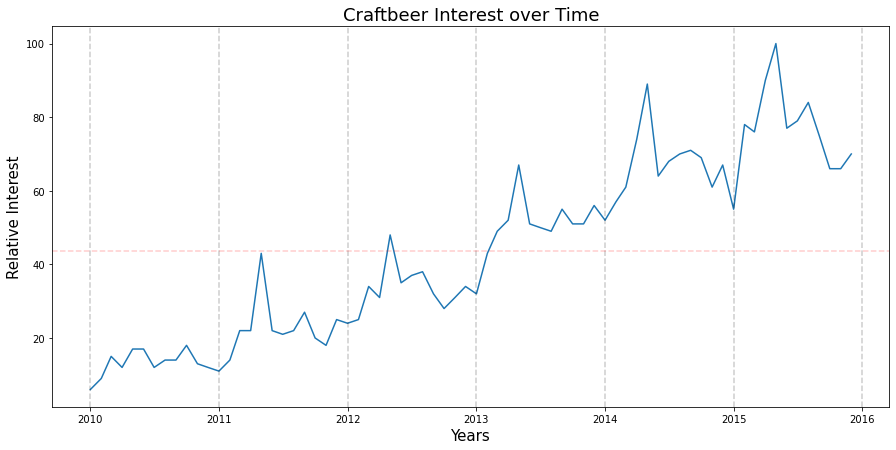

In [30]:
#Craftbeer Data
t_s_prod(df_craftbeer['Relative Interest'], 'Craftbeer Interest over Time')

Interest on craftbeer over the years seems to be a strong rising trend with seasonality factor

### ADF Test:
Test-statistic < Critical value -> Reject Ho -> Stationary Time Series\
Test-statistic > Critical value -> Fail to reject Ho -> Not stationary Time Series

In [31]:
def ADF_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(
        dftest[0:4],
        index=["Test Statistic", "p-value", "Lags Used", "Number of Observations Used"],
    )
    #Critical Values
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    #Test index
    dfoutput["Test Index ", ]= dftest[5]/100
    
    print(dfoutput)
    #Hypothesis check
    alpha= 0.05  # 95% CI
    if dfoutput[1] < alpha:  # p-value < alpha
        print('We reject null hypothesis. Time Series is STATIONARY')
    else:
        print("We fail to reject null hypothesis. Time Series is NOT STATIONARY")

In [32]:
ADF_test(df_craftbeer)

Results of Dickey-Fuller Test:
Test Statistic                 -0.016032
p-value                         0.957186
Lags Used                      12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
Test Index                      3.885017
dtype: float64
We fail to reject null hypothesis. Time Series is NOT STATIONARY


### Detrending the data:
Let's detrend the data has in lowest lags as possible

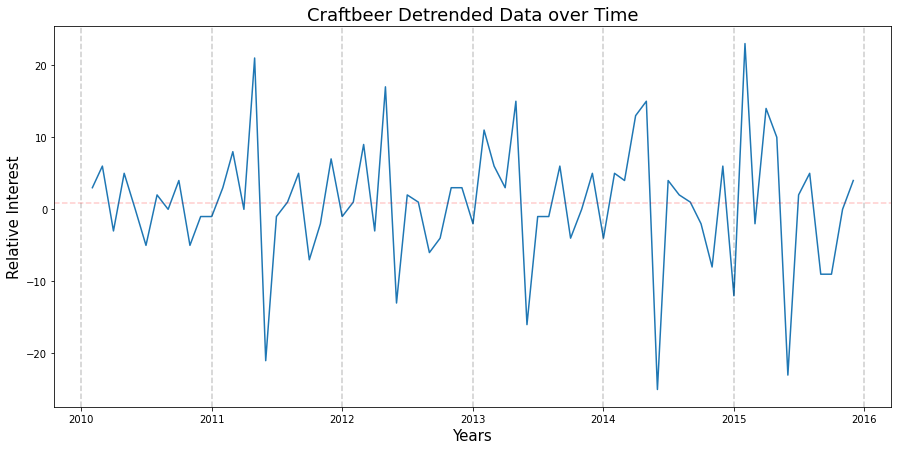

In [33]:
craftbeer_diff1= df_craftbeer.diff(1)[1:]
t_s_prod(craftbeer_diff1['Relative Interest'], 'Craftbeer Detrended Data over Time')

In [34]:
ADF_test(craftbeer_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.470456
p-value                         0.008779
Lags Used                      11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
Test Index                      3.805196
dtype: float64
We reject null hypothesis. Time Series is STATIONARY


### ACF & PACF Plots
If the top of the bar falls in the lag region, its effect is considered as significantly 0. Lag Operators with not significantly zero should only be considered for predicting the model.

#### ACF Plot
Cumulative lag effect for MA(q)

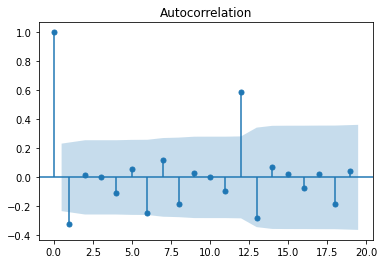

In [35]:
acf_plot = plot_acf(craftbeer_diff1)

Lags 1,12 are signifcant\
Plot shows significant seasonal affect

#### PACF Plots
Partial lag effect for AR(p)

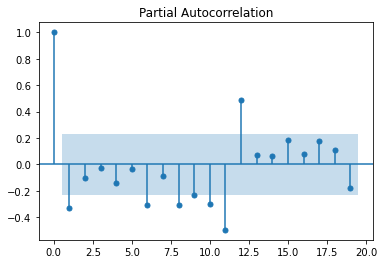

In [36]:
pacf_plot = plot_pacf(craftbeer_diff1)

Lag operator 11,1,12,6,8,10,9 are significant\
Plot shows significant seasonal affect

### ARIMA Model

In [37]:
#For AR, MA, ARMA: d,P,D,Q,M=0
#For ARIMA: P,D,Q,M=0
def sarima_model(df, p,d,q,P,D,Q,M):
    #Training & Testing sets
    #Training is from 2010 to 2014
    #Testing is from 2015 Jan to 2015 Dec
    train_end = datetime(2014,12,1)
    test_end = datetime(2015,12,1)
    train_data= df[:train_end]
    test_data= df[train_end + timedelta(days=1):test_end]
    
    #Model Definition:
    my_order = (p,d,q)
    my_seasonal_order = (P,D,Q,M)
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    
    #Model Fitting:
    start = time()
    model_fit = model.fit()
    end = time()
    print('Model Fitting Time:', end - start)
    
    #Model Summary:
    print(model_fit.summary())
    
    #get prediction start and end dates
    pred_start_date = test_data.index[0]
    pred_end_date = test_data.index[-1]
    
    #get the predictions and residuals
    predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
    #predictions = model_fit.forecast(len(test_data))
    residuals = test_data['Relative Interest'] - predictions
    
    
    #Residuals Graph
    plt.figure(figsize=(15,7))
    plt.plot(residuals)
    plt.title('Residuals from SARIMA Model', fontsize=18)
    plt.xlabel('Years', size= 15)
    plt.ylabel('Error', fontsize=15)
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)
    
    #Data vs Predictions
    plt.figure(figsize=(15,7))
    plt.plot(df)
    plt.plot(predictions)
    plt.legend(('Data', 'Predictions'), fontsize=15)
    plt.title('Data vs Predictions', fontsize=18)
    plt.xlabel('Years', size= 15)
    plt.ylabel('Relative Interest', fontsize=15)
    for year in range(2010,2017):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
    
    print('\n')
    #Forecast Errors
    print('Root Mean Squared Error(RMSE):', round(np.sqrt(np.mean(residuals**2)),2))
    print('Mean Absolute Percentage Error(MAPE):', round(100*np.mean(np.abs(residuals/test_data['Relative Interest'])),2))
    
    #Future Dates
    future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,13)]
    future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
    global future_df
    future_df=pd.concat([df,future_dates_df])
    future_end_date= future_df.index[-1]
    future_df['Forecast'] = model_fit.predict(start = pred_end_date, end = future_end_date)
    
    #Plotting Forecast
    plt.figure(figsize=(15,7))
    plt.plot(future_df['Relative Interest'])
    plt.plot(future_df['Forecast'])
    plt.legend(('Data', 'Forecast'), fontsize=15)
    plt.title('SARIMA Forecast', fontsize=18)
    plt.xlabel('Years', size= 15)
    plt.ylabel('Relative Interest', fontsize=15)
    for year in range(2010,2018):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Model Fitting Time: 0.17154669761657715
                               SARIMAX Results                                
Dep. Variable:      Relative Interest   No. Observations:                   60
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -203.091
Date:                Mon, 07 Nov 2022   AIC                            412.182
Time:                        11:48:15   BIC                            418.415
Sample:                    01-01-2010   HQIC                           414.615
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0721      0.544      0.132      0.895      -0.995       1.139
ma.L1         -0.4219      0.442     -0.954      0.340      -1.289       0.445
sigma2      

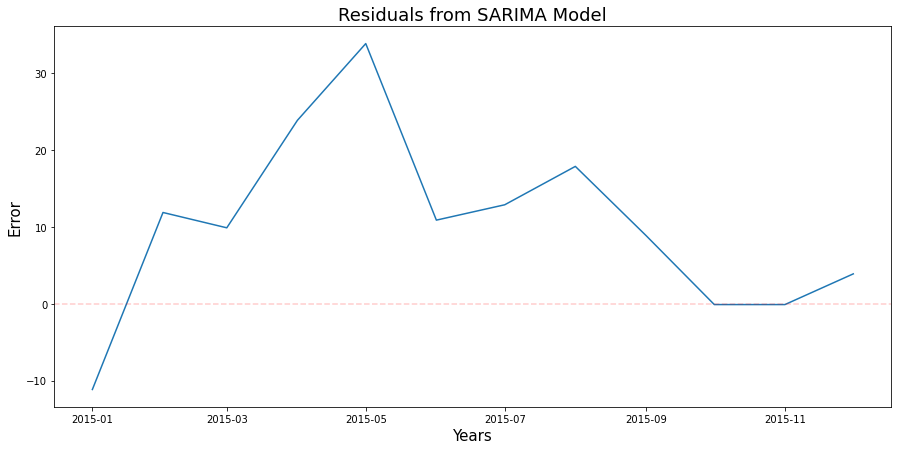

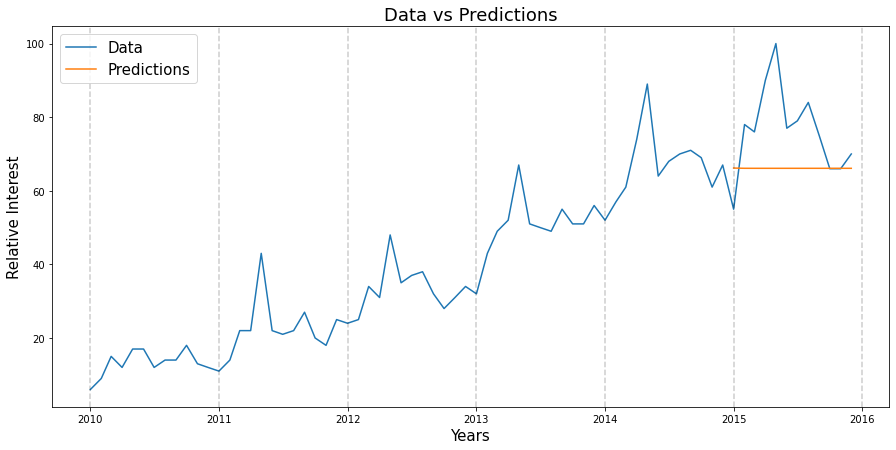

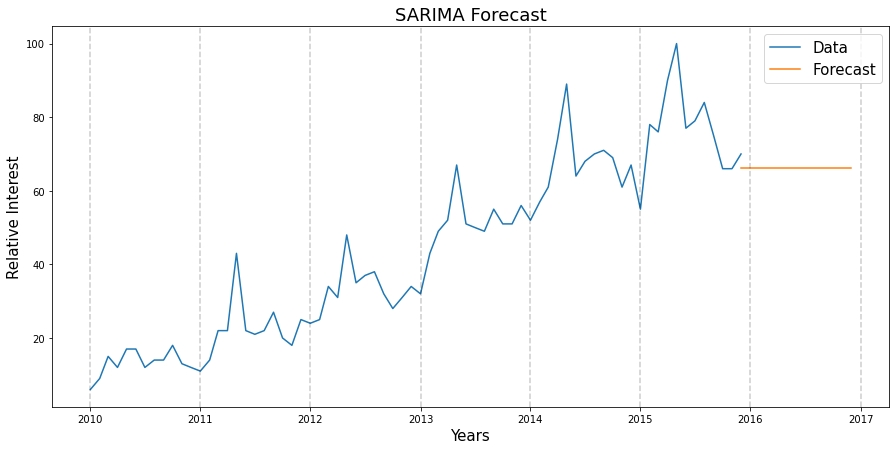

In [38]:
#p=1, d=1, q=1
sarima_model(df_craftbeer,1,1,1,0,0,0,0)

**Recommendation:** Residuals are still dynamic in nature, predictions are not accurate, and the error is high. Need to try SARIMA method

### SARIMA Model
p-values less than 0.05 in the result table are significant

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model Fitting Time: 0.213700532913208
                                      SARIMAX Results                                       
Dep. Variable:                    Relative Interest   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -189.049
Date:                              Mon, 07 Nov 2022   AIC                            384.098
Time:                                      11:48:16   BIC                            390.331
Sample:                                  01-01-2010   HQIC                           386.531
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9146      0.134      6.830      0.000      

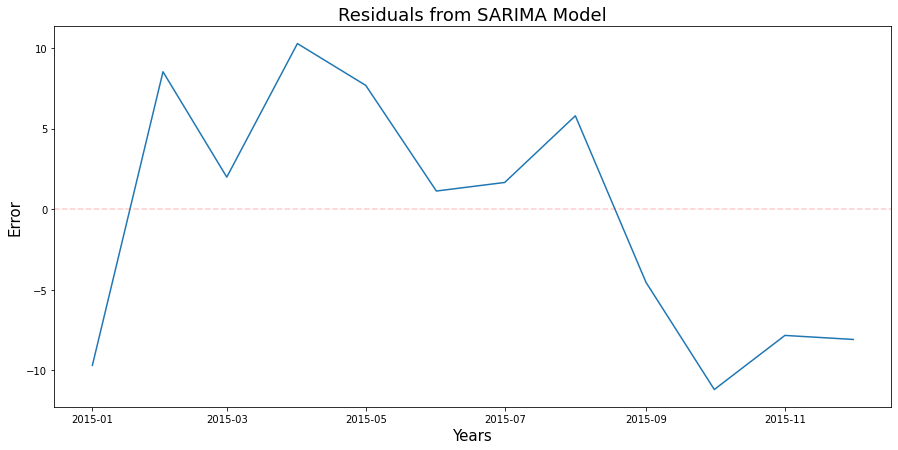

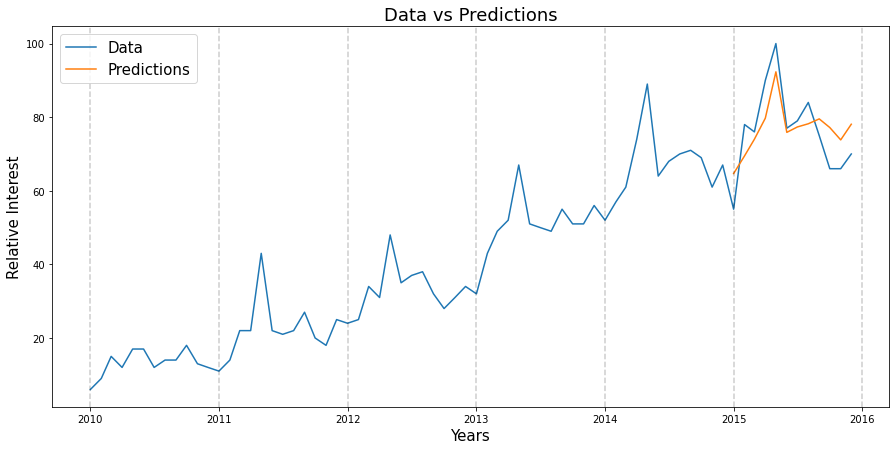

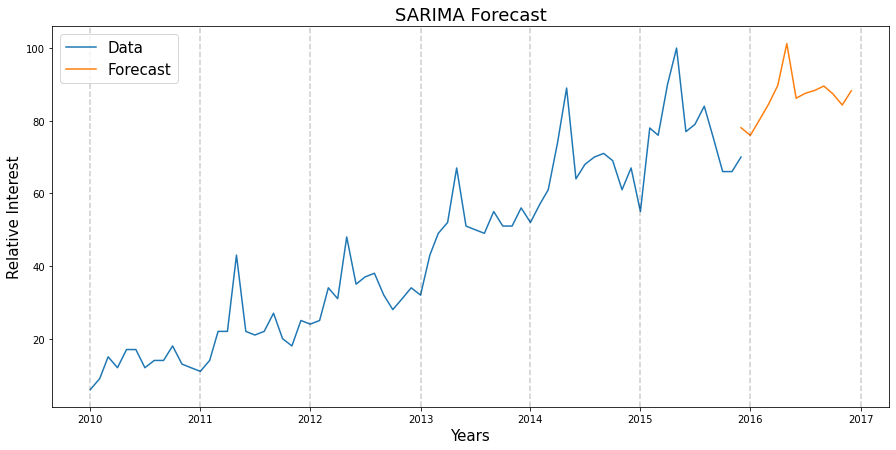

In [39]:
#ACF & PACF has peaks at 12, which indicates pure seasonal nature of series
#M is no of months in the year
#p=0, d=1, q=0, P= 1, D= 0, Q= 1, M=12 
sarima_model(df_craftbeer, 0,1,0,1,0,1,12)

Cannot try each iteration, use auto ARIMA to find appropriate model

### Auto ARIMA

In [40]:
#AUTO Arima code: Minimize AIC & BIC
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
#df= auto_arima(df, seasonal= , stationary= ,m= 12, 
                           #max_order= None, max_p= ,max_d= , max_q= , max_P= ,max_D= ,max_Q= ,
                           #information_criterion= 'oob', out_of_sample_size= int(len(df) * 0.2),
                           #n_jobs= -1, trace= True)
#df.summary()

In [41]:
#AUTO Arima code using aic
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
#trace: shows process log data
craftbeer_auto= auto_arima(df_craftbeer, m= 12, 
                           max_order= None, max_d= 1, max_q= 11,
                           n_jobs= -1, trace= True)
craftbeer_auto.summary()

C:\Users\JARVIS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=385.034, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=394.703, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=381.608, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=385.568, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=489.745, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=384.287, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=382.024, Time=0.84 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=382.708, Time=0.43 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=380.787, Time=0.23 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=382.585, Time=0.56 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=383.577, Time=1.59 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=392.441, Time=0.10 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=380.735, Time=0.32 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=385.484, Time=0.12 sec
 ARIMA(2,0,0)(1,1,1)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -184.827
Date:                            Mon, 07 Nov 2022   AIC                            379.654
Time:                                    11:48:34   BIC                            390.125
Sample:                                01-01-2010   HQIC                           383.750
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2703      1.458      0.871      0.384      -1.587       4.127
ar.L1          0.8945      0.114      7.816      0.000       0.670       1.119
ma.L1         -0.5783      0.134     -4.330      0.000      -0.840      -0.317
ma.S.L12      -0.4151      0.195     -2.125      0.034      -0.798      -0.032
sigma2        26.5676      4.883      5.440      0.000      16.996      36.139
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.74   Prob(JB):                         0.57
Heteroskedasticity (H):               1.17   Skew:                             0.25
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
#AUTO Arima code using oob
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
craftbeer_auto= auto_arima(df_craftbeer, m= 12, 
                           max_order= None, max_d= 1, max_q= 11,
                           information_criterion= 'oob', out_of_sample_size= 12,
                           n_jobs= -1, trace= True)
craftbeer_auto.summary()

C:\Users\JARVIS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize oob
 ARIMA(2,0,2)(1,1,1)[12] intercept   : OOB=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : OOB=60.410, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : OOB=56.989, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : OOB=55.627, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : OOB=133.083, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : OOB=59.680, Time=0.13 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : OOB=57.732, Time=0.79 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : OOB=56.449, Time=0.58 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : OOB=58.332, Time=0.34 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : OOB=55.633, Time=1.60 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : OOB=56.159, Time=0.20 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : OOB=57.340, Time=0.68 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : OOB=53.390, Time=0.37 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : OOB=58.228, Time=0.18 sec
 ARIMA(0,0,2)(1,1,1)[12] intercept   : OOB=53.675

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   72
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -186.567
Date:                              Mon, 07 Nov 2022   AIC                            383.134
Time:                                      11:48:47   BIC                            393.606
Sample:                                           0   HQIC                           387.230
                                               - 72                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.2991      0.761     17.482      0.000      11.808      14.790
ma.L1          0.4160      0.117      3.567      0.000       0.187       0.645
ma.L2          0.2361      0.189      1.252      0.210      -0.133       0.606
ma.S.L12      -0.4238      0.196     -2.167      0.030      -0.807      -0.041
sigma2        26.7511      5.228      5.116      0.000      16.504      36.999
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.95   Prob(JB):                         0.83
Heteroskedasticity (H):               1.11   Skew:                             0.17
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model Fitting Time: 0.24785637855529785
                                     SARIMAX Results                                      
Dep. Variable:                  Relative Interest   No. Observations:                   60
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -146.035
Date:                            Mon, 07 Nov 2022   AIC                            300.071
Time:                                    11:48:47   BIC                            307.556
Sample:                                01-01-2010   HQIC                           302.899
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.004    267.081      0.000       0.991       1

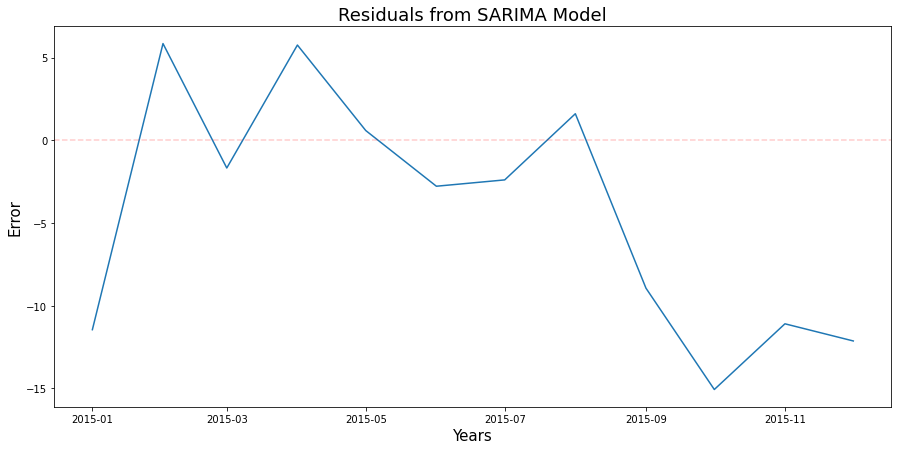

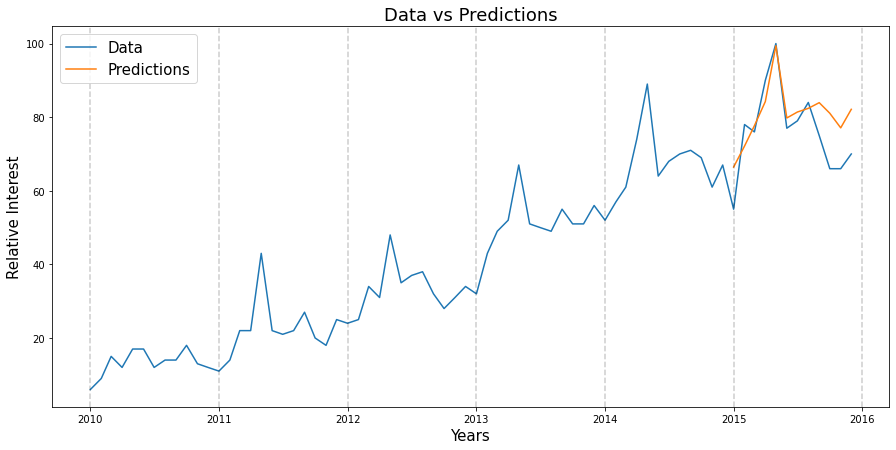

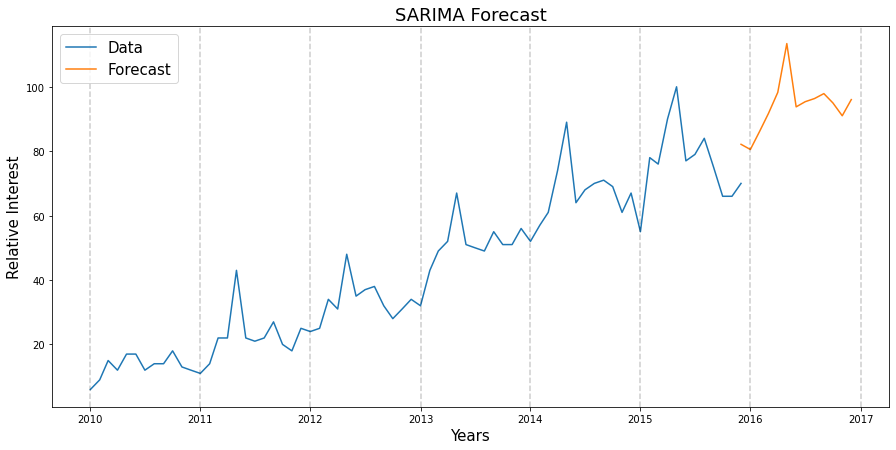

In [43]:
#M is no of months in the year
#p=1, d=0, q=1, P= 0, D= 1, Q= 1, M=12 
sarima_model(df_craftbeer, 1,0,1,0,1,1,12)

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model Fitting Time: 0.21987557411193848
                                      SARIMAX Results                                       
Dep. Variable:                    Relative Interest   No. Observations:                   60
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -167.721
Date:                              Mon, 07 Nov 2022   AIC                            343.441
Time:                                      11:48:48   BIC                            350.926
Sample:                                  01-01-2010   HQIC                           346.270
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9028      0.131      6.908      0.000    

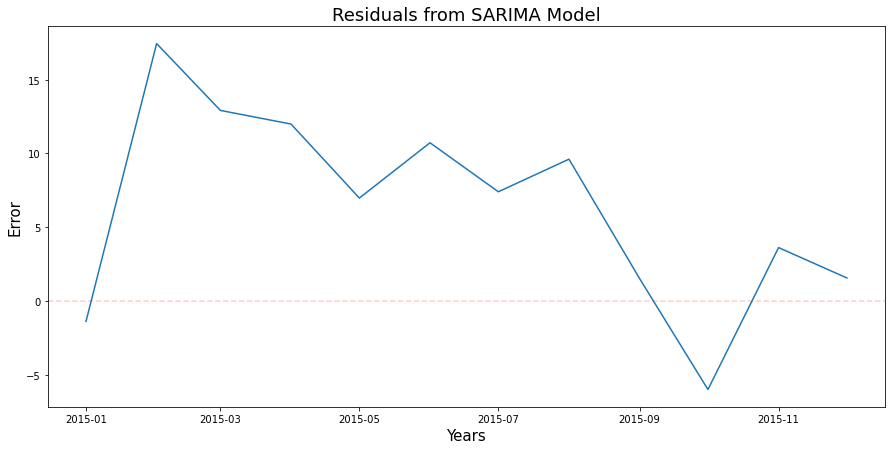

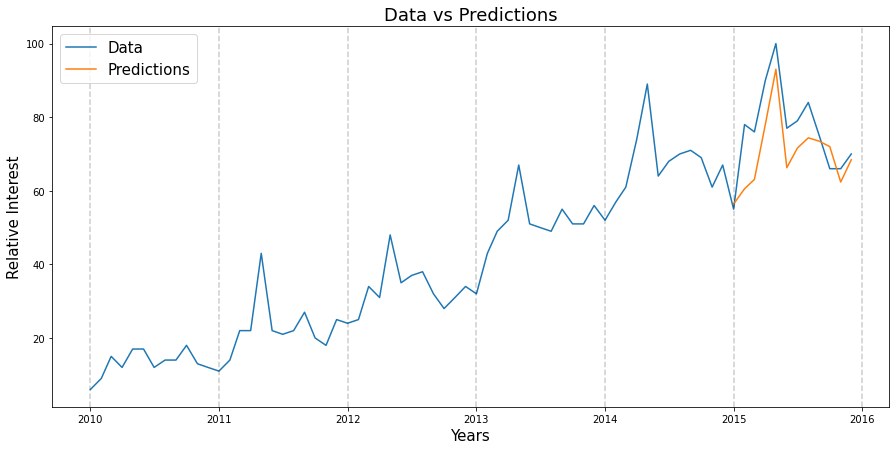

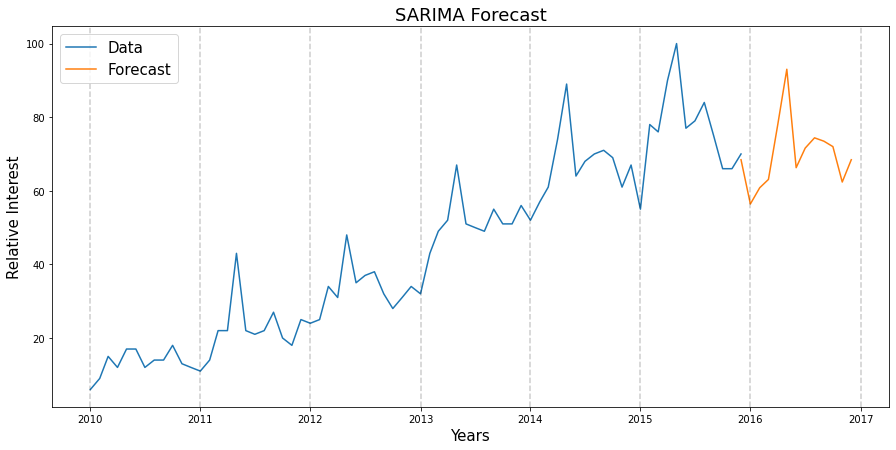

In [44]:
#M is no of months in the year
#p=0, d=0, q=2, P= 0, D= 1, Q= 1, M=12 
sarima_model(df_craftbeer, 0,0,2,0,1,1,12)

**Recommendation: SARIMA(0,0,2)(0,1,1)[12]** is the best fit

### Upcoming Trend

In [45]:
#Defining function for plotting
def future_graph(series, name):
    plt.figure(figsize=(15,7))
    plt.plot(series)
    plt.title(name, fontsize= 18)
    plt.xlabel('Months', fontsize= 15)
    plt.ylabel('Relative Interest', fontsize= 15)
    for month in range(1,13):
        plt.axvline(pd.to_datetime('2016-'+ str(month)+ '-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(series.mean(), color='r', alpha=0.2, linestyle='--')

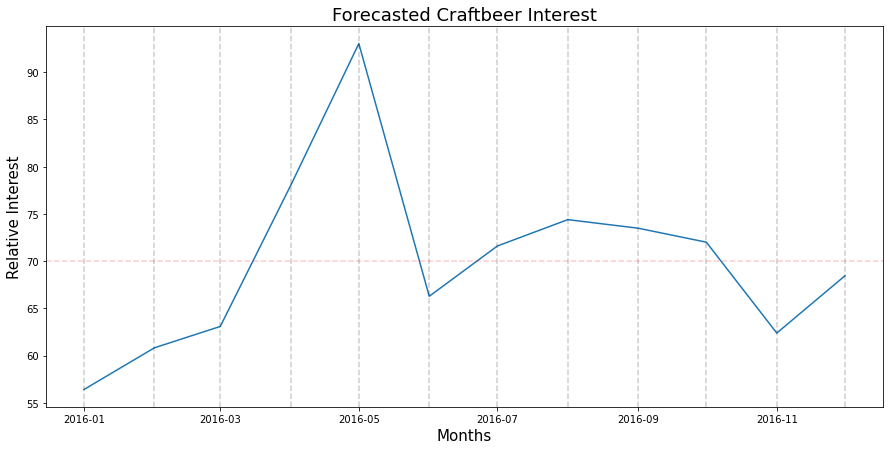

In [46]:
# extracting forecast data from the function
# drop Relative Interest column
# dropping NaN values from forecast
# dropping 1st row data of date 2015-12-01
craftbeer_future= future_df.drop('Relative Interest', axis= 1).dropna().iloc[1:]

future_graph(craftbeer_future['Forecast'], 'Forecasted Craftbeer Interest')

### Whiskey

### Visualize the Data

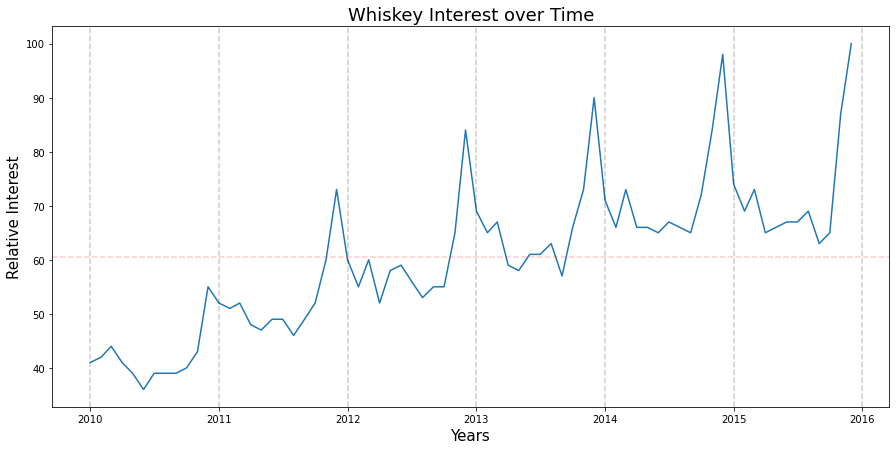

In [47]:
#Whiskey Data
t_s_prod(df_whiskey['Relative Interest'], 'Whiskey Interest over Time')

Interest on whiskey over the years seems to be a rising trend with seasonality factor

### ADF Test:
Test-statistic < Critical value -> Reject Ho -> Stationary Time Series\
Test-statistic > Critical value -> Fail to reject Ho -> Not stationary Time Series

In [48]:
ADF_test(df_whiskey)

Results of Dickey-Fuller Test:
Test Statistic                 -2.991639
p-value                         0.035683
Lags Used                      12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
Test Index                      3.275008
dtype: float64
We reject null hypothesis. Time Series is STATIONARY


### ACF & PACF Plots
If the top of the bar falls in the lag region, its effect is considered as significantly 0. Lag Operators with not significantly zero should only be considered for predicting the model.

#### ACF Plot
Cumulative lag effect for MA(q)

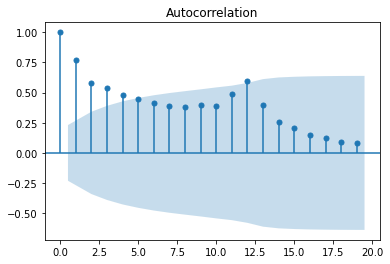

In [49]:
acf_plot = plot_acf(df_whiskey)

Lags 1,2,3,4,12 are signifcant\
Plot signifies seasonal affect

#### PACF Plots
Partial lag effect for AR(p)

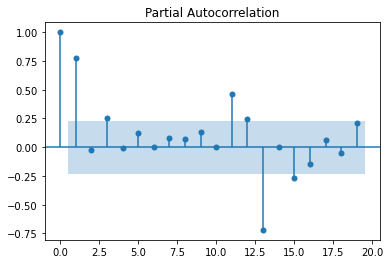

In [50]:
pacf_plot = plot_pacf(df_whiskey)

Lag operator 1,11,3,13,15 are significant\
Plot signifies seasonal affect

### Auto ARIMA

In [51]:
#AUTO Arima code: Minimize AIC & BIC for aic
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
whiskey_auto= auto_arima(df_whiskey, stationary= True,m= 12, 
                           max_order= None, max_p= 11,max_d= 0, max_q= 4, max_P= 3,max_Q= 1,
                           n_jobs= -1, trace= True)
whiskey_auto.summary()

C:\Users\JARVIS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=585.147, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=422.182, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=800.547, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=504.583, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=423.943, Time=0.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=517.449, Time=0.25 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=421.955, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=506.102, Time=0.13 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=423.487, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   72
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood                -203.566
Date:                             Mon, 07 Nov 2022   AIC                            417.131
Time:                                     11:49:15   BIC                            428.515
Sample:                                 01-01-2010   HQIC                           421.663
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4177      0.197      7.181      0.000       1.031       1.805
ar.L2         -0.4209      0.194     -2.174      0.030      -0.800      -0.041
ma.L1         -0.8620      0.116     -7.439      0.000      -1.089      -0.635
ar.S.L12       0.8968      0.049     18.273      0.000       0.801       0.993
sigma2        11.7805      2.466      4.777      0.000       6.947      16.614
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.76   Prob(JB):                         0.71
Heteroskedasticity (H):               1.42   Skew:                             0.18
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
#AUTO Arima code: Minimize AIC & BIC for oob
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
whiskey_auto= auto_arima(df_whiskey, stationary= True,m= 12, 
                           max_order= None, max_p= 11,max_d= 0, max_q= 4, max_P= 3,max_Q= 1,
                           information_criterion= 'oob', out_of_sample_size= 12,
                           n_jobs= -1, trace= True)
whiskey_auto.summary()

Performing stepwise search to minimize oob


C:\Users\JARVIS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


 ARIMA(2,0,2)(1,0,1)[12] intercept   : OOB=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : OOB=303.610, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : OOB=35.099, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : OOB=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[12]             : OOB=5304.083, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : OOB=298.771, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : OOB=inf, Time=0.68 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : OOB=36.265, Time=0.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : OOB=inf, Time=0.19 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : OOB=39.816, Time=1.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : OOB=19.790, Time=0.26 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : OOB=17.636, Time=0.74 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : OOB=inf, Time=1.70 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : OOB=19.486, Time=0.94 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : OOB=inf, Time=0.39 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   72
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -233.613
Date:                              Mon, 07 Nov 2022   AIC                            477.225
Time:                                      11:49:50   BIC                            488.608
Sample:                                           0   HQIC                           481.757
                                               - 72                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7311      0.125      5.863      0.000       0.487       0.976
ma.L2          0.4868      0.118      4.142      0.000       0.256       0.717
ar.S.L12       0.9744      0.025     38.549      0.000       0.925       1.024
ma.S.L12       0.2976      0.172      1.730      0.084      -0.039       0.635
sigma2        21.1424      4.842      4.367      0.000      11.653      30.632
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.07   Prob(JB):                         0.89
Heteroskedasticity (H):               0.71   Skew:                            -0.08
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMA Model
p-values less than 0.05 in the result table are significant

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespac

Model Fitting Time: 0.33656764030456543
                                      SARIMAX Results                                      
Dep. Variable:                   Relative Interest   No. Observations:                   60
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood                -169.458
Date:                             Mon, 07 Nov 2022   AIC                            348.915
Time:                                     11:49:51   BIC                            359.387
Sample:                                 01-01-2010   HQIC                           353.012
                                      - 12-01-2014                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4168      0.208      6.803      0.000       1.009

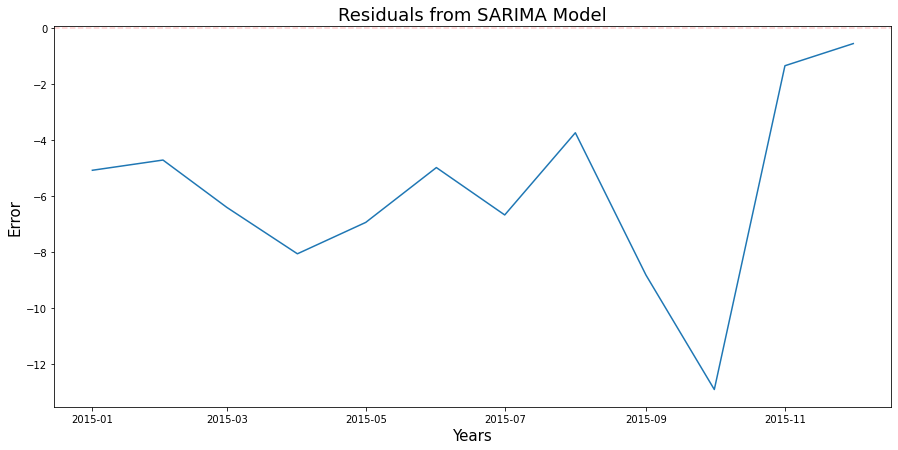

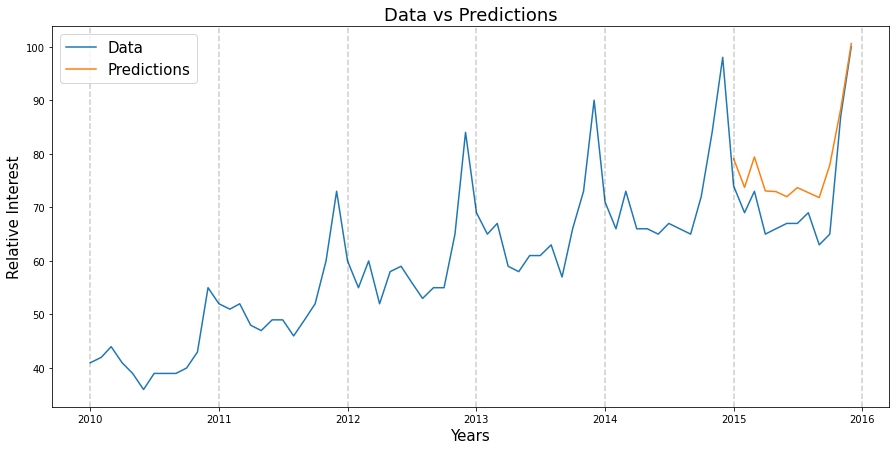

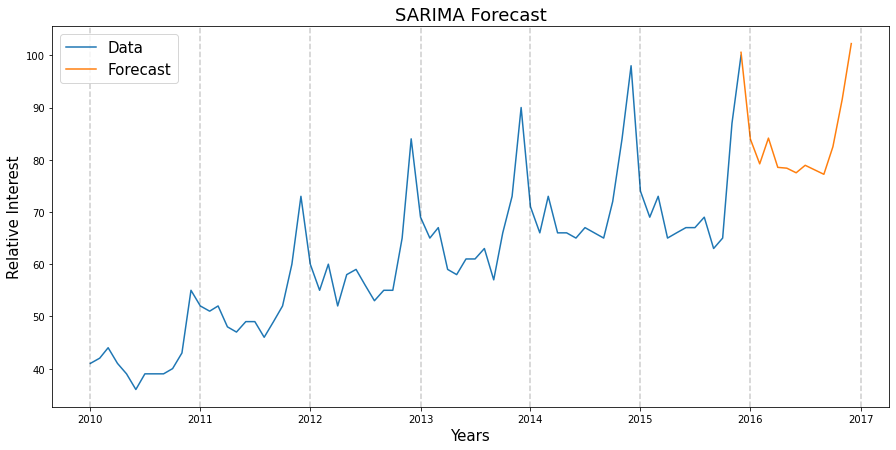

In [53]:
#ACF & PACF has peaks at 12, which indicates pure seasonal nature of series
#M is no of months in the year
#p=2, d=0, q=1, P= 1, D= 0, Q= 0, M=12 
sarima_model(df_whiskey, 2,0,1,1,0,0,12)

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Model Fitting Time: 0.3979020118713379
                                      SARIMAX Results                                       
Dep. Variable:                    Relative Interest   No. Observations:                   60
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -199.547
Date:                              Mon, 07 Nov 2022   AIC                            409.093
Time:                                      11:49:52   BIC                            419.565
Sample:                                  01-01-2010   HQIC                           413.189
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8023      0.124      6.460      0.000     

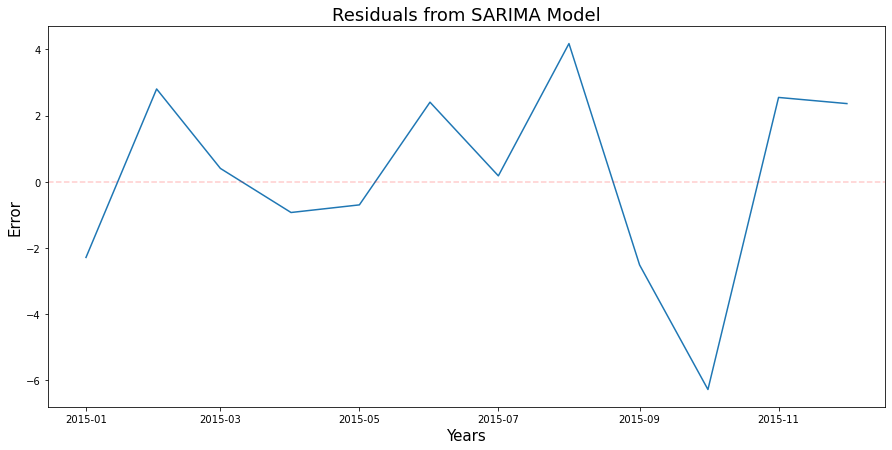

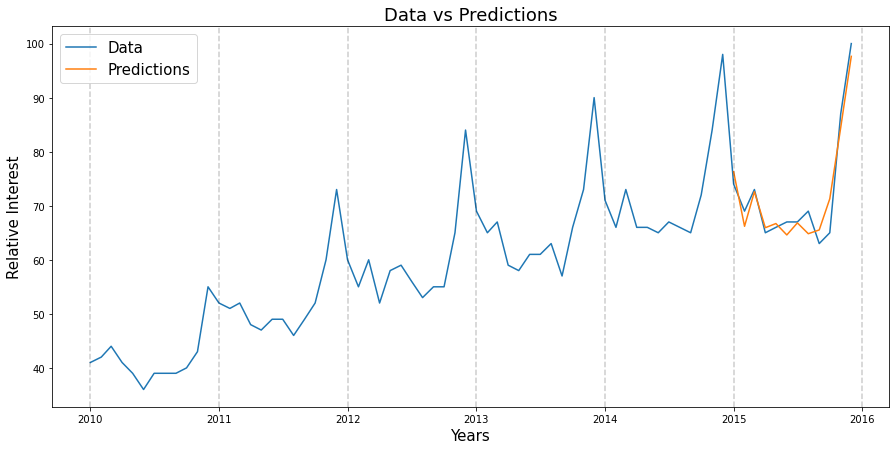

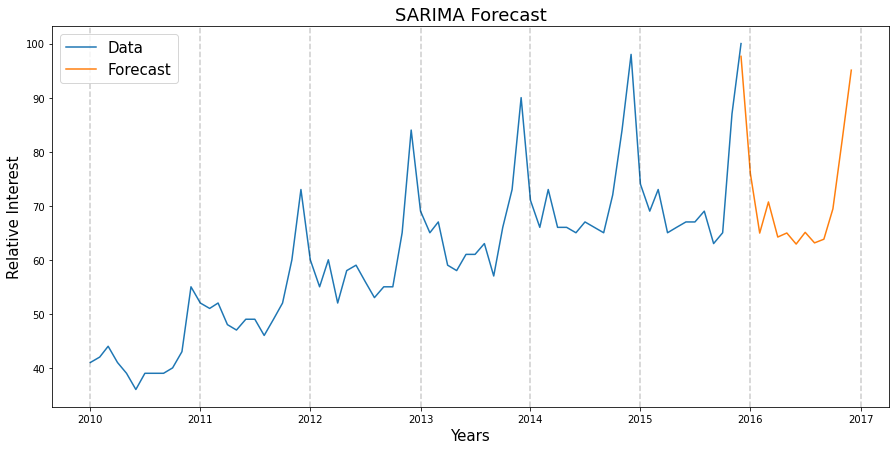

In [54]:
#M is no of months in the year
#p=0, d=0, q=2, P= 1, D= 0, Q= 1, M=12 
sarima_model(df_whiskey, 0,0,2,1,0,1,12)

**Recommendation: SARIMA(0,0,2)(1,0,1)[12]** is the best fit

### Upcoming Trend

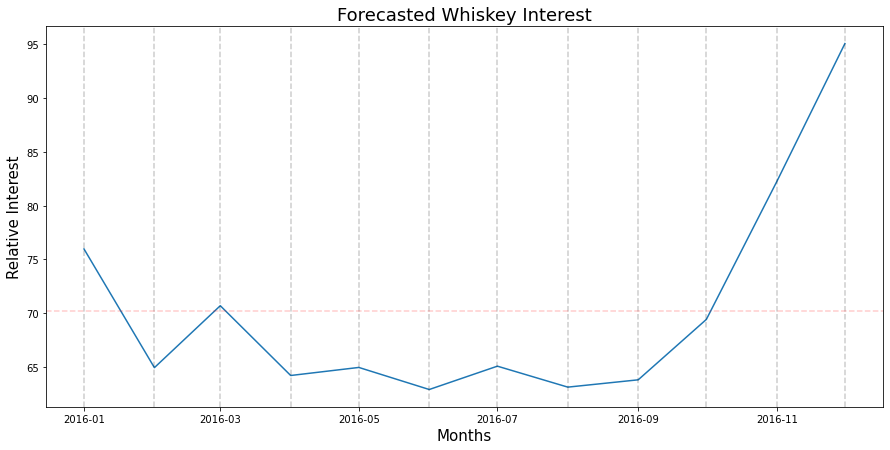

In [55]:
# extracting forecast data from the function
# drop Relative Interest column
# dropping NaN values from forecast
# dropping 1st row data of date 2015-12-01
whiskey_future= future_df.drop('Relative Interest', axis= 1).dropna().iloc[1:]

future_graph(whiskey_future['Forecast'], 'Forecasted Whiskey Interest')

### White Wine

### Visualize the Data

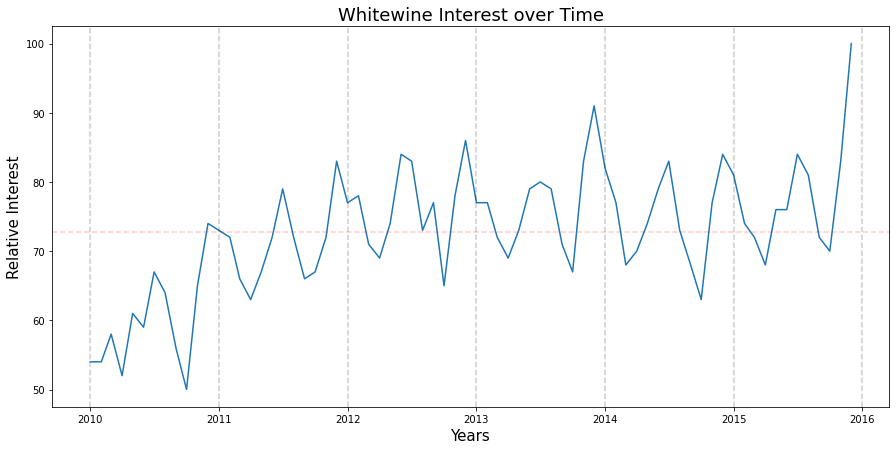

In [56]:
#Whitewine Data
t_s_prod(df_whitewine['Relative Interest'], 'Whitewine Interest over Time')

Interest on white wine over the years seems to have no trend & no seasonality factor

### ADF Test:
Test-statistic < Critical value -> Reject Ho -> Stationary Time Series\
Test-statistic > Critical value -> Fail to reject Ho -> Not stationary Time Series

In [57]:
ADF_test(df_whitewine)

Results of Dickey-Fuller Test:
Test Statistic                 -1.620020
p-value                         0.472719
Lags Used                      12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
Test Index                      3.482912
dtype: float64
We fail to reject null hypothesis. Time Series is NOT STATIONARY


### Detrending the data:
Let's detrend the data has in lowest lags as possible

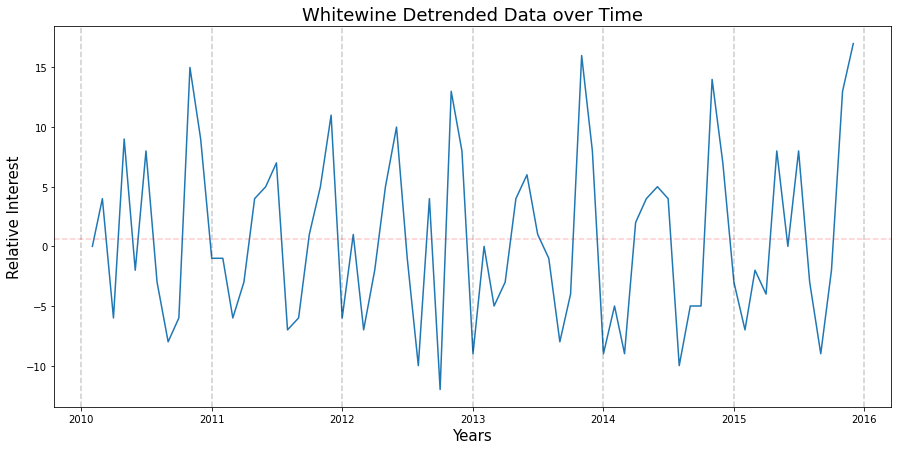

In [58]:
whitewine_diff1= df_whitewine.diff(1)[1:]
t_s_prod(whitewine_diff1['Relative Interest'], 'Whitewine Detrended Data over Time')

In [59]:
ADF_test(whitewine_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -2.044018
p-value                         0.267612
Lags Used                      12.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
Test Index                      3.410703
dtype: float64
We fail to reject null hypothesis. Time Series is NOT STATIONARY


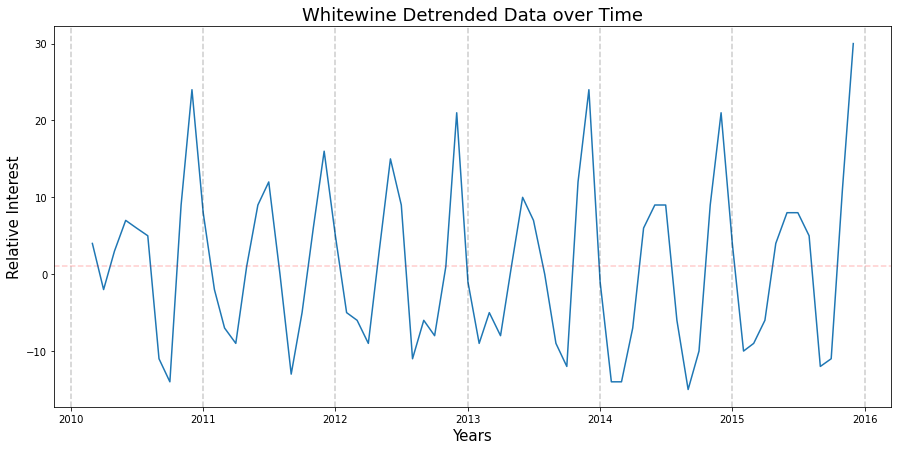

In [60]:
whitewine_diff1= df_whitewine.diff(2)[2:]
t_s_prod(whitewine_diff1['Relative Interest'], 'Whitewine Detrended Data over Time')

In [61]:
ADF_test(whitewine_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -2.180274
p-value                         0.213482
Lags Used                      11.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
Test Index                      3.456868
dtype: float64
We fail to reject null hypothesis. Time Series is NOT STATIONARY


Try diff 12 since original & diff data are showing highly seasonal nature from year to year

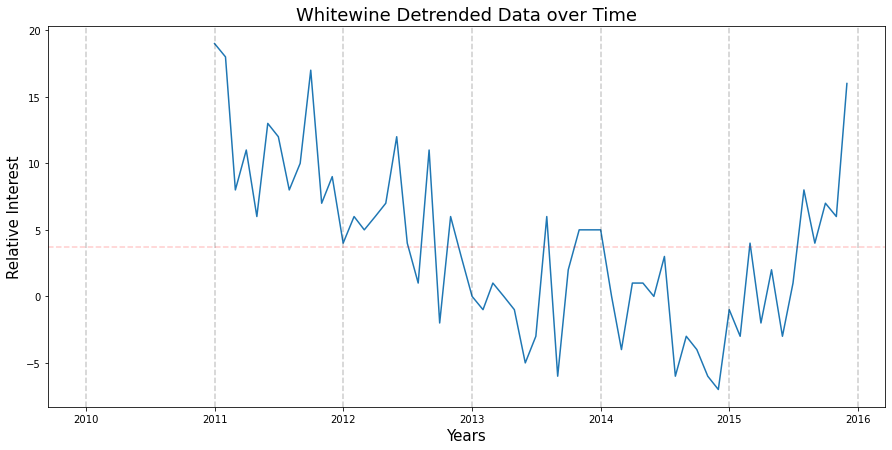

In [62]:
whitewine_diff1= df_whitewine.diff(12)[12:]
t_s_prod(whitewine_diff1['Relative Interest'], 'Whitewine Detrended Data over Time')

In [63]:
ADF_test(whitewine_diff1)

Results of Dickey-Fuller Test:
Test Statistic                 -2.884228
p-value                         0.047213
Lags Used                       1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
Test Index                      2.805825
dtype: float64
We reject null hypothesis. Time Series is STATIONARY


Check if diff 11 is resulting into stationary series or not

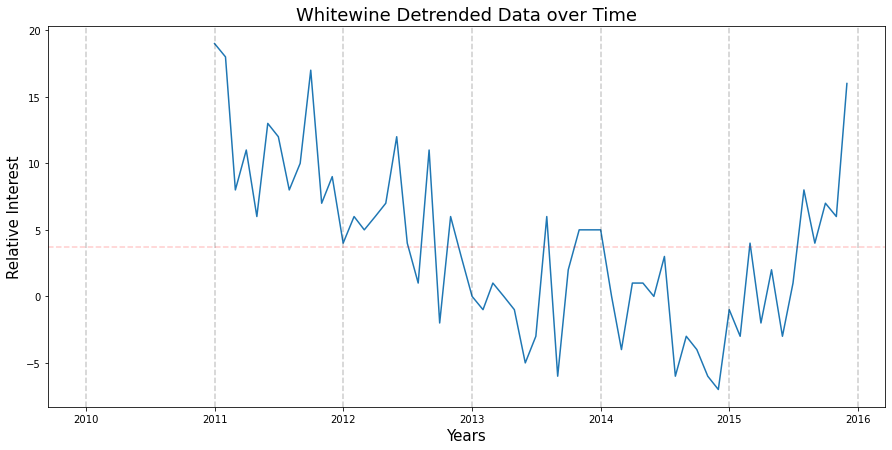

In [64]:
whitewine_diff11= df_whitewine.diff(11)[11:]
t_s_prod(whitewine_diff1['Relative Interest'], 'Whitewine Detrended Data over Time')

In [65]:
ADF_test(whitewine_diff11)

Results of Dickey-Fuller Test:
Test Statistic                 -2.052058
p-value                         0.264224
Lags Used                      11.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
Test Index                      3.116962
dtype: float64
We fail to reject null hypothesis. Time Series is NOT STATIONARY


So diff 12 is our required stationary data.

### ACF & PACF Plots
If the top of the bar falls in the lag region, its effect is considered as significantly 0. Lag Operators with not significantly zero should only be considered for predicting the model.

#### ACF Plot
Cumulative lag effect for MA(q)

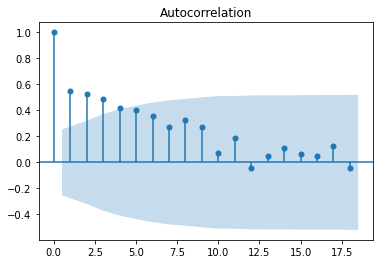

In [66]:
acf_plot = plot_acf(whitewine_diff1)

Lags 1,2,3,4 are signifcant\
Plot does not signifies seasonal affect

#### PACF Plots
Partial lag effect for AR(p)

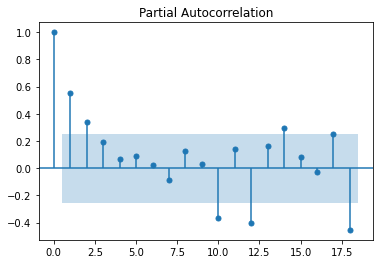

In [67]:
pacf_plot = plot_pacf(whitewine_diff1)

Lag operator 1,2,10,12,14,17,18 are significant\
Plot does signify seasonal affect

### Auto ARIMA

In [68]:
#AUTO Arima code: Minimize AIC & BIC for aic
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
whitewine_auto= auto_arima(df_whitewine, m= 12, 
                           max_order= None, max_p= 10,max_d= 12, max_q= 4, max_P= 6,
                           n_jobs= -1, trace= True)
whitewine_auto.summary()

C:\Users\JARVIS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=367.481, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=344.406, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=338.389, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=349.049, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=341.133, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=339.855, Time=0.27 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=339.783, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=340.307, Time=0.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=339.192, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -166.194
Date:                            Mon, 07 Nov 2022   AIC                            338.389
Time:                                    11:50:01   BIC                            344.621
Sample:                                01-01-2010   HQIC                           340.822
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5451      0.149     -3.649      0.000      -0.838      -0.252
ma.S.L12      -0.8001      0.393     -2.036      0.042      -1.570      -0.030
sigma2        13.4254      3.927      3.419      0.001       5.728      21.123
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.44   Prob(JB):                         0.40
Heteroskedasticity (H):               0.58   Skew:                             0.42
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
#AUTO Arima code: Minimize AIC & BIC
#m= seasonal cycle length
#max_order= p + q
#max_p,q: do not specify if less than 2 
#max_P,Q: do not specify if 0
#seasonal: default true
#stationary: default false
#n_jobs= how many models fit at a time(-1 means fit as many as possible), depending on your CPU, result in faster model building
#information_criterion:('aic', 'aicc', 'bic', 'hqic', 'oob'), default: aic
#oob requires out_of_sample_size= int(len(df) * 0.2) or manual_int
whitewine_auto= auto_arima(df_whitewine, m= 12, 
                           max_order= None, max_p= 10,max_d= 12, max_q= 4, max_P= 6,
                           information_criterion= 'oob', out_of_sample_size= 12,
                           n_jobs= -1, trace= True)
whitewine_auto.summary()

C:\Users\JARVIS\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize oob
 ARIMA(2,1,2)(1,1,1)[12]             : OOB=47.556, Time=0.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=133.250, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=75.727, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=38.249, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=94.566, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=39.289, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=40.324, Time=0.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=63.837, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=40.277, Time=0.30 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=40.917, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=28.932, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=126.284, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=27.195, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -167.023
Date:                                 Mon, 07 Nov 2022   AIC                            342.046
Time:                                         11:50:12   BIC                            350.356
Sample:                                              0   HQIC                           345.290
                                                  - 72                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4689      0.128     -3.651      0.000      -0.721      -0.217
ma.S.L12      -0.7079      0.425     -1.664      0.096      -1.541       0.126
ma.S.L24      -0.1004      0.235     -0.428      0.669      -0.560       0.359
sigma2        13.9486      5.337      2.614      0.009       3.489      24.408
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.42   Prob(JB):                         0.62
Heteroskedasticity (H):               0.48   Skew:                             0.31
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMA Model
p-values less than 0.05 in the result table are significant

Model Fitting Time: 0.13792061805725098


C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                  Relative Interest   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -132.771
Date:                            Mon, 07 Nov 2022   AIC                            271.541
Time:                                    11:50:12   BIC                            277.092
Sample:                                01-01-2010   HQIC                           273.630
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5696      0.166     -3.424      0.001      -0.896      -0.244
ma.S.L12      -0.5256      0.238   

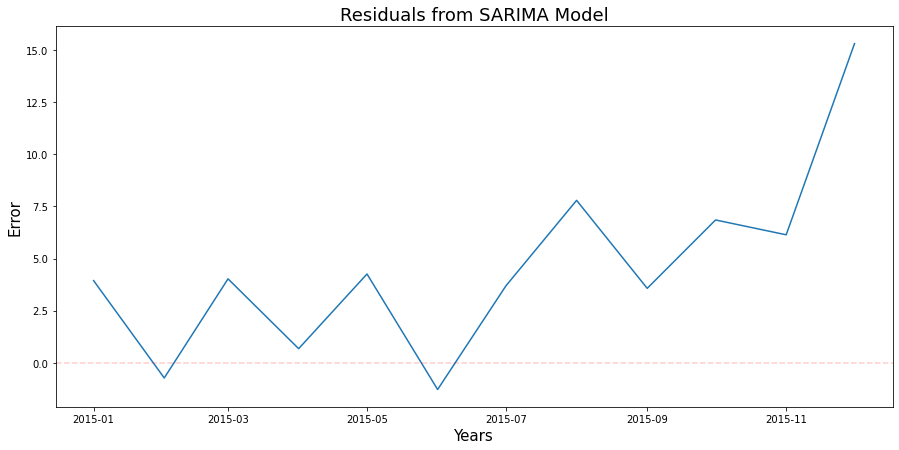

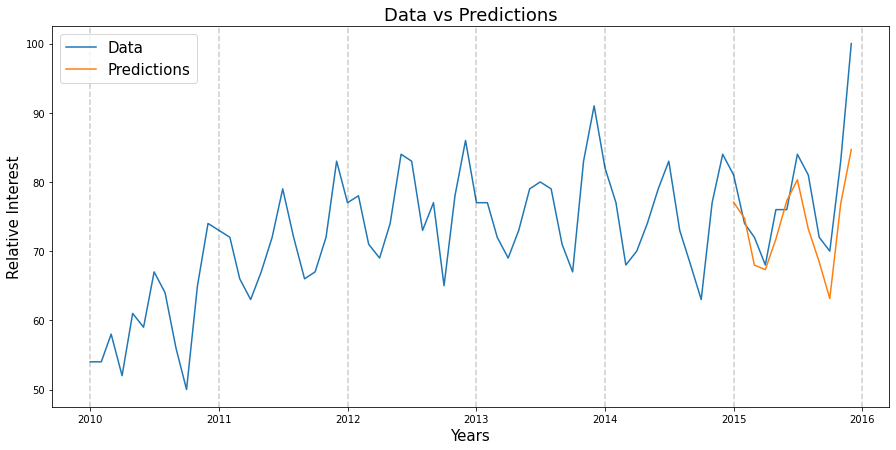

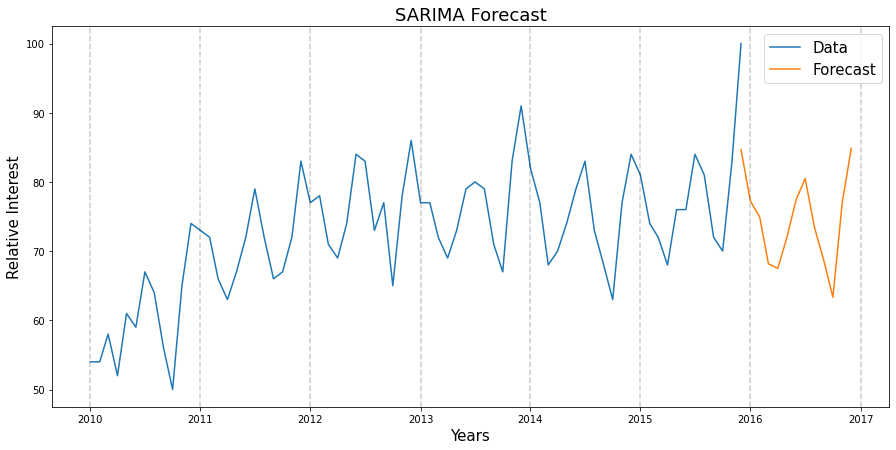

In [70]:
#M is no of months in the year
#p=0, d=1, q=1, P= 0, D= 1, Q= 1, M=12
sarima_model(df_whitewine,0,1,1,0,1,1,12)

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 0.2428605556488037
                                        SARIMAX Results                                        
Dep. Variable:                       Relative Interest   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -134.296
Date:                                 Mon, 07 Nov 2022   AIC                            276.593
Time:                                         11:50:14   BIC                            283.993
Sample:                                     01-01-2010   HQIC                           279.377
                                          - 12-01-2014                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4442      0.148   

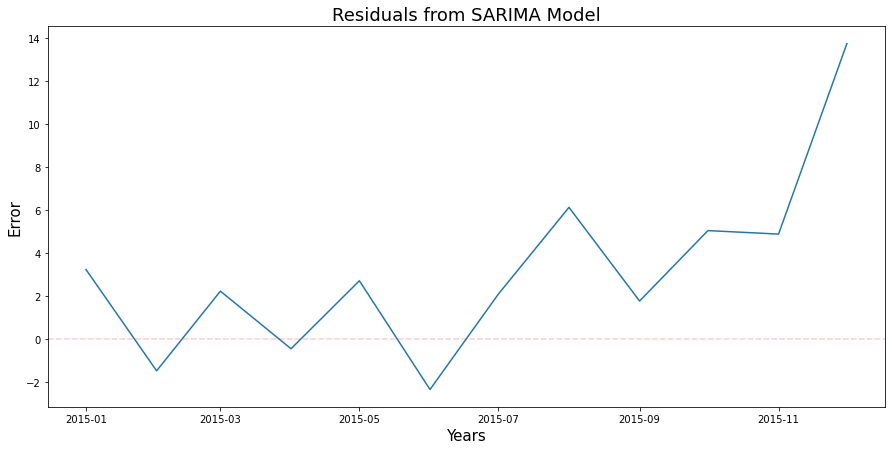

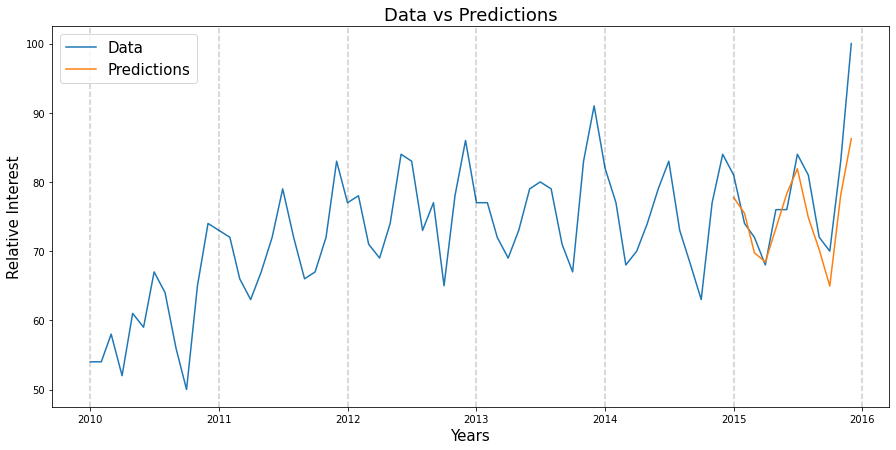

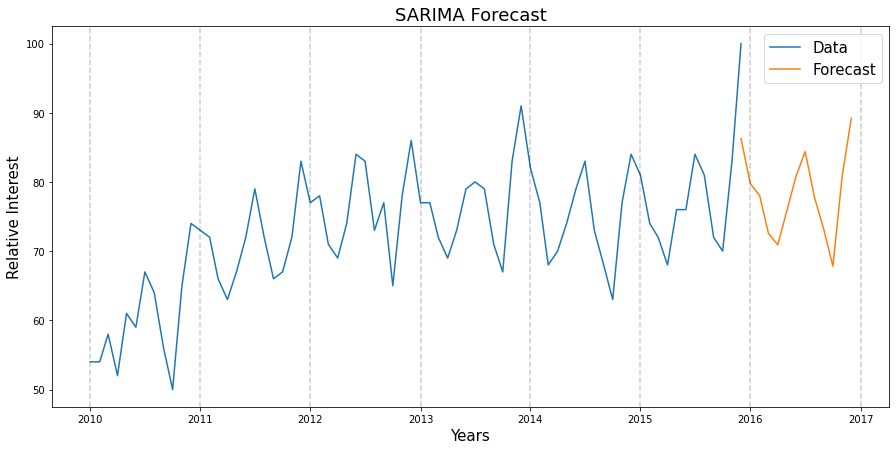

In [71]:
#M is no of months in the year
#p=1, d=1, q=0, P= 0, D= 1, Q= 2, M=12
sarima_model(df_whitewine,1,1,0,0,1,2,12)

**Recommendation: SARIMA(1,1,0)(0,1,2)[12]** is the best fit

### Upcoming Trend

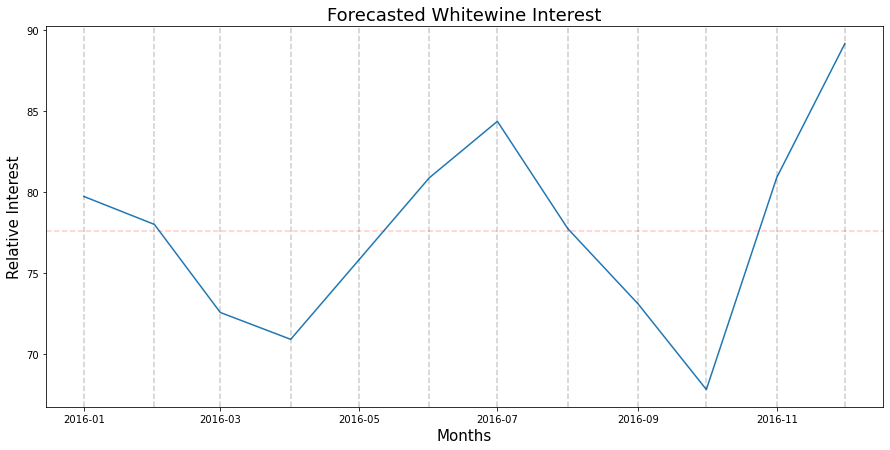

In [72]:
# extracting forecast data from the function
# drop Relative Interest column
# dropping NaN values from forecast
# dropping 1st row data of date 2015-12-01
whitewine_future= future_df.drop('Relative Interest', axis= 1).dropna().iloc[1:]

future_graph(whitewine_future['Forecast'], 'Forecasted Whitewine Interest')

## Business Case Questions

### What did the trends and seasonality for each product look like?

**Assumption:** Given Google Trends data is complete and sufficient in nature for depicting trends & seasonality of each product

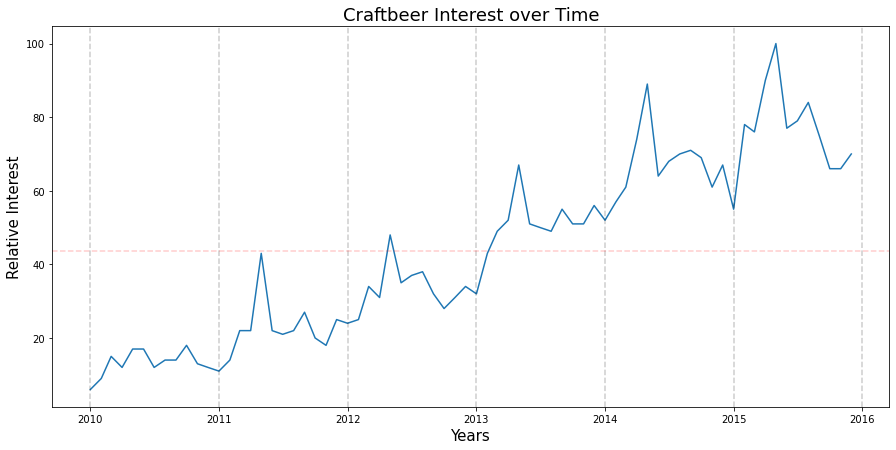

In [73]:
#Craftbeer Data
t_s_prod(df_craftbeer['Relative Interest'], 'Craftbeer Interest over Time')

Interest on craftbeer over the years seems to be a strong rising trend with seasonality factor

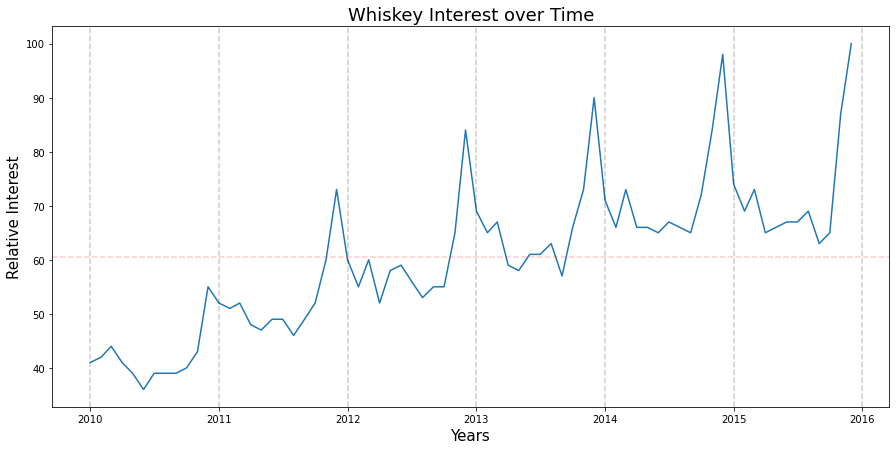

In [74]:
#Whiskey Data
t_s_prod(df_whiskey['Relative Interest'], 'Whiskey Interest over Time')

Interest on whiskey over the years seems to be a rising trend with seasonality factor

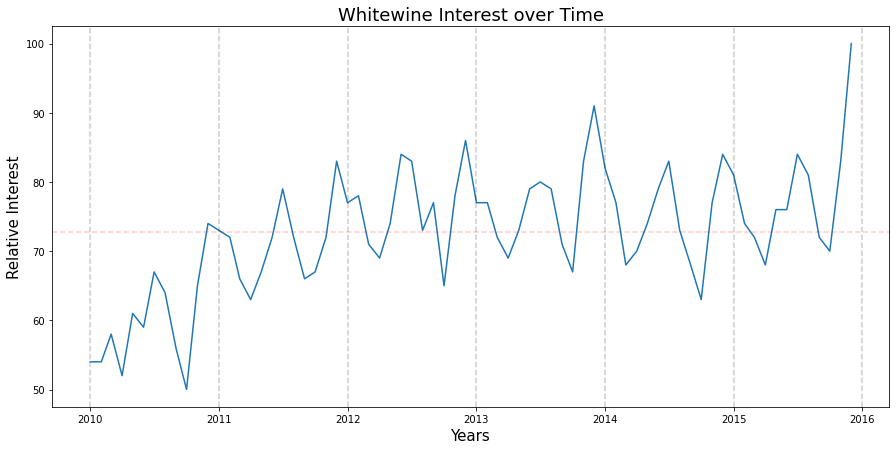

In [75]:
#Whitewine Data
t_s_prod(df_whitewine['Relative Interest'], 'Whitewine Interest over Time')

Interest on white wine over the years seems to have no trend & no seasonality factor

### When should Vintage Vino exactly release the new white wine in the upcoming year to maximize sales?

In [76]:
#Creating a copy of required dataframe
vintage_vino= df_whitewine.copy()
#Extracting year & month from date column
vintage_vino['Year']= pd.DatetimeIndex(df_whitewine.index).year
vintage_vino['Month']= pd.DatetimeIndex(df_whitewine.index).month

In [77]:
#Creating dfs for each year
vintage_vino_2010= vintage_vino[vintage_vino['Year']== 2010]
vintage_vino_2011= vintage_vino[vintage_vino['Year']== 2011]
vintage_vino_2012= vintage_vino[vintage_vino['Year']== 2012]
vintage_vino_2013= vintage_vino[vintage_vino['Year']== 2013]
vintage_vino_2014= vintage_vino[vintage_vino['Year']== 2014]
vintage_vino_2015= vintage_vino[vintage_vino['Year']== 2015]

**Assumption:** Google Trends data is directly proportional to the sales of the product. In other words, Google search related to the particular product converts directly into the sale of that product. 

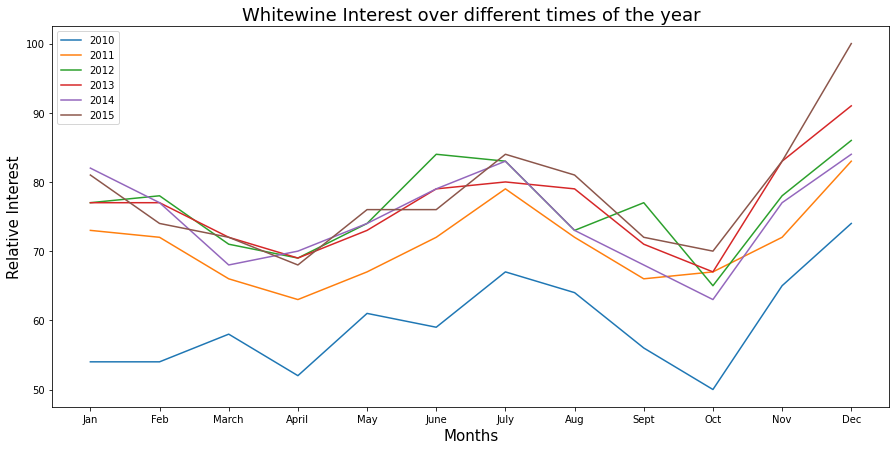

In [78]:
#Plotting the figure
plt.figure(figsize=(15, 7))
plt.plot(vintage_vino_2010['Month'],vintage_vino_2010['Relative Interest'])
plt.plot(vintage_vino_2011['Month'],vintage_vino_2011['Relative Interest'])
plt.plot(vintage_vino_2012['Month'],vintage_vino_2012['Relative Interest'])
plt.plot(vintage_vino_2013['Month'],vintage_vino_2013['Relative Interest'])
plt.plot(vintage_vino_2014['Month'],vintage_vino_2014['Relative Interest'])
plt.plot(vintage_vino_2015['Month'],vintage_vino_2015['Relative Interest'])
#Labels
plt.xlabel('Months', size= 15)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Relative Interest', size= 15)
plt.title("Whitewine Interest over different times of the year", size= 18)
plt.legend(["2010","2011","2012","2013","2014","2015"])

plt.show()

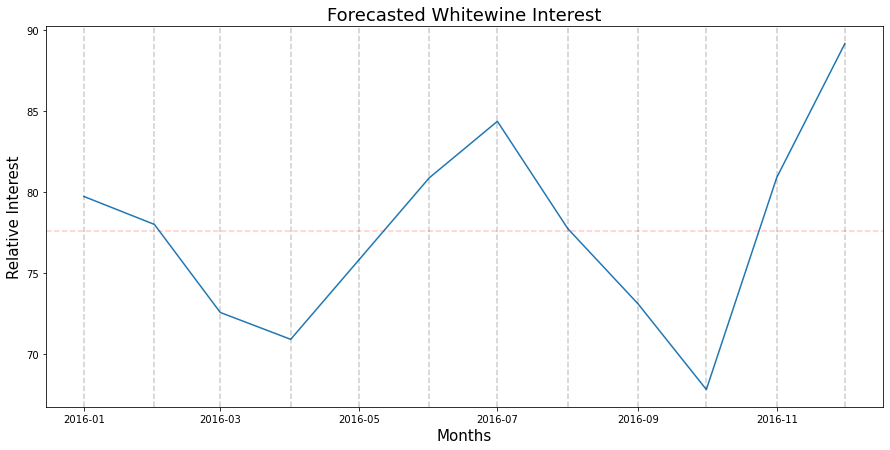

In [79]:
future_graph(whitewine_future['Forecast'], 'Forecasted Whitewine Interest')

**Recommendation:** Since the past interest & forecasted interest over white wine shows a very strong trend from October to the end of the year, Vintage Vino should release its new product in September(just before the uptrend) to maximize its sales.

### Upcoming consumer trends for On The Rocks Whiskey distributor? 

**Assumption:** Google Trends data is directly proportional to the sales of the product. In other words, Google search related to the particular product converts directly into the sale of that product. 

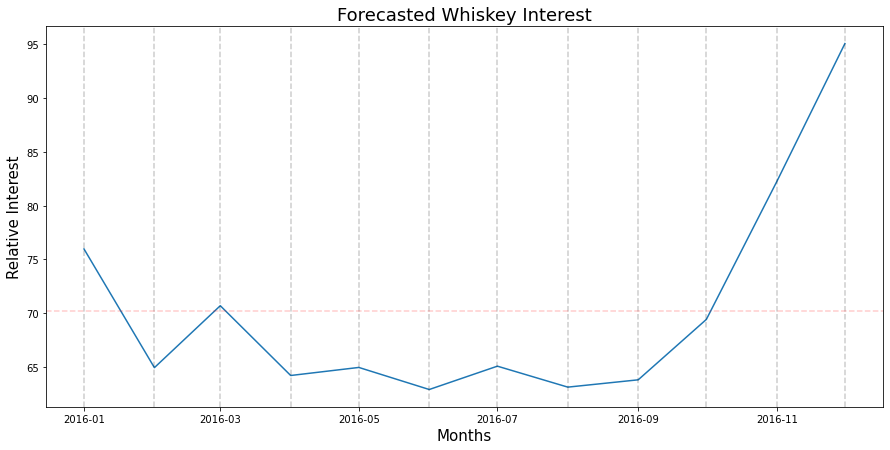

In [80]:
future_graph(whiskey_future['Forecast'], 'Forecasted Whiskey Interest')

**Recommendation:** For next year, On the Rocks should focus on its product sales from September, since the interest of customers takes an uptrend over that period.

### Market trends for Downtown Brew Co.?

**Assumption:** Google Trends data is directly proportional to the sales of the product. In other words, Google search related to the particular product converts directly into the sale of that product. 

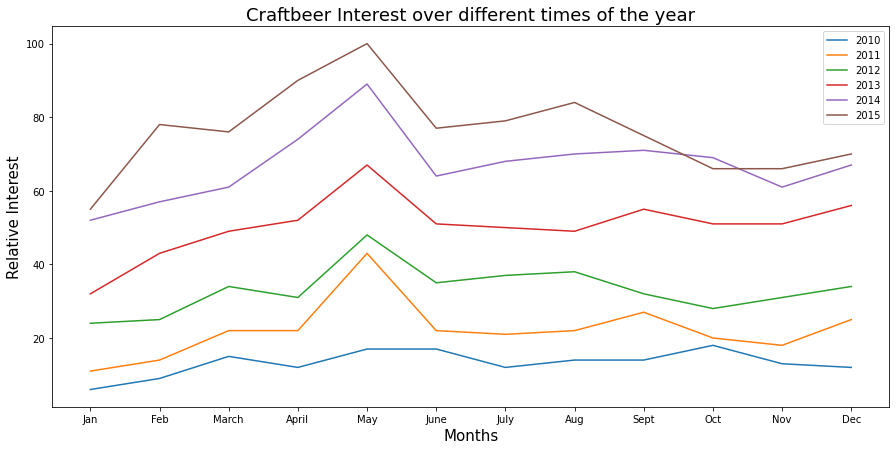

In [81]:
#Creating a copy of required dataframe
downtown_brew= df_craftbeer.copy()
#Extracting year & month from date column
downtown_brew['Year']= pd.DatetimeIndex(df_craftbeer.index).year
downtown_brew['Month']= pd.DatetimeIndex(df_craftbeer.index).month

#Creating dfs for each year
downtown_brew_2010= downtown_brew[downtown_brew['Year']== 2010]
downtown_brew_2011= downtown_brew[downtown_brew['Year']== 2011]
downtown_brew_2012= downtown_brew[downtown_brew['Year']== 2012]
downtown_brew_2013= downtown_brew[downtown_brew['Year']== 2013]
downtown_brew_2014= downtown_brew[downtown_brew['Year']== 2014]
downtown_brew_2015= downtown_brew[downtown_brew['Year']== 2015]

#Plotting the figure
plt.figure(figsize=(15, 7))
plt.plot(downtown_brew_2010['Month'],downtown_brew_2010['Relative Interest'])
plt.plot(downtown_brew_2011['Month'],downtown_brew_2011['Relative Interest'])
plt.plot(downtown_brew_2012['Month'],downtown_brew_2012['Relative Interest'])
plt.plot(downtown_brew_2013['Month'],downtown_brew_2013['Relative Interest'])
plt.plot(downtown_brew_2014['Month'],downtown_brew_2014['Relative Interest'])
plt.plot(downtown_brew_2015['Month'],downtown_brew_2015['Relative Interest'])
#Labels
plt.xlabel('Months', size= 15)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Relative Interest', size= 15)
plt.title("Craftbeer Interest over different times of the year", size= 18)
plt.legend(["2010","2011","2012","2013","2014","2015"])

plt.show()

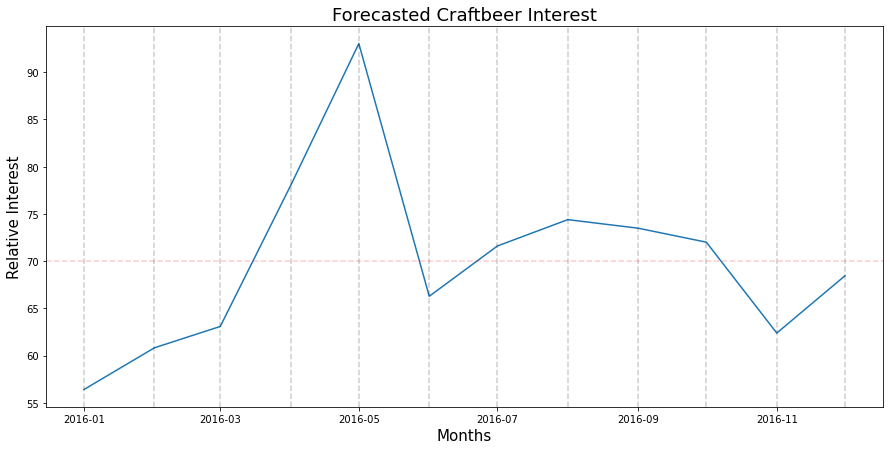

In [82]:
future_graph(craftbeer_future['Forecast'], 'Forecasted Craftbeer Interest')

**Recommendation:** Since the past interest & forecasted interest over craft beer shows a very strong trend from November of previous year to May of next year, Downtown Brew should focus on its sales in this period.

### Effectiveness of Google Trends in predicting consumer demand for upcoming years?

| Product Name | Prediction Model | MAPE % | Accuracy % 
| :-: | :-: | :-: | :-:
| Craftbeer | SARIMA(0,0,2)(0,1,1)[12] | 9.65 | 90.35
| Whiskey | SARIMA(0,0,2)(1,0,1)[12] | 3.26 | 96.74
| Whitewine |SARIMA(1,1,0)(0,1,2)[12] | 4.65 | 95.35

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model Fitting Time: 0.22203421592712402
                                      SARIMAX Results                                       
Dep. Variable:                    Relative Interest   No. Observations:                   60
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -167.721
Date:                              Mon, 07 Nov 2022   AIC                            343.441
Time:                                      11:50:18   BIC                            350.926
Sample:                                  01-01-2010   HQIC                           346.270
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9028      0.131      6.908      0.000    

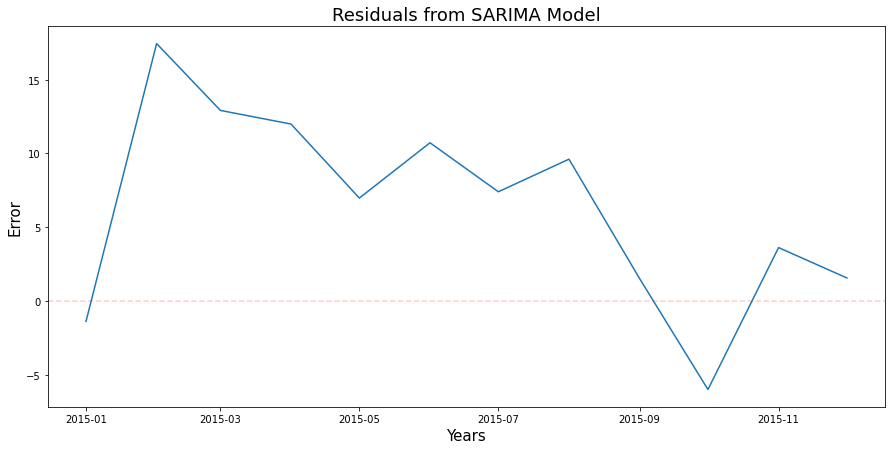

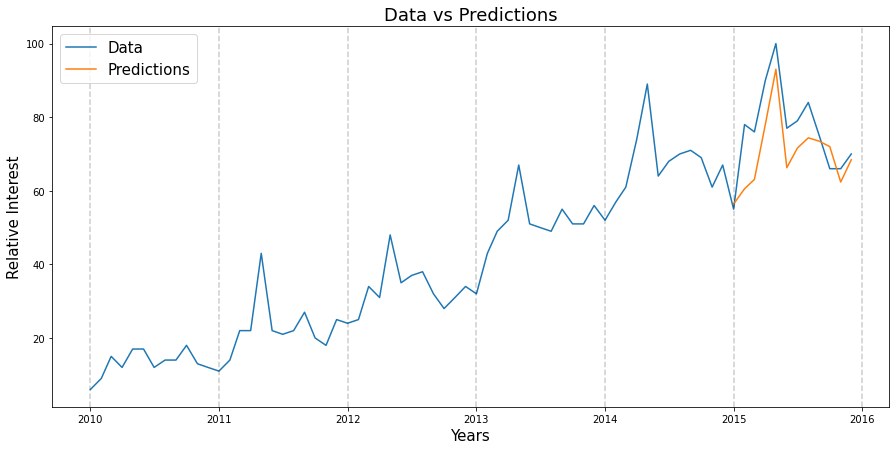

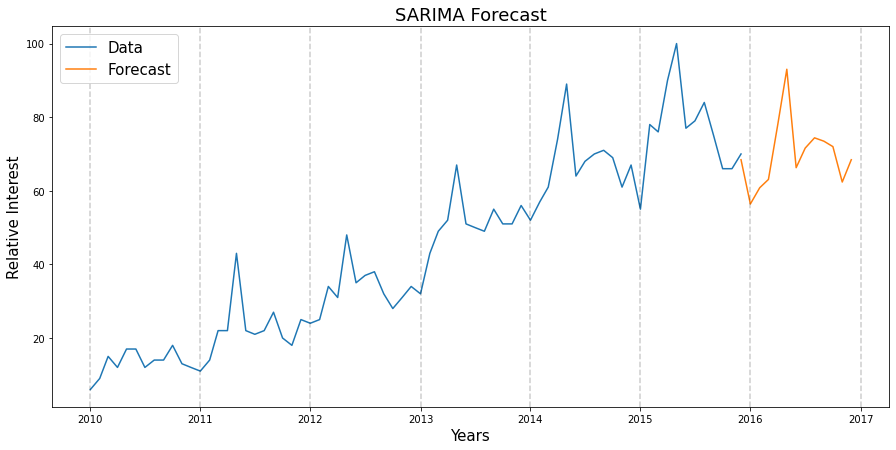

In [83]:
#M is no of months in the year
#p=0, d=0, q=2, P= 0, D= 1, Q= 1, M=12 
sarima_model(df_craftbeer, 0,0,2,0,1,1,12)

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Model Fitting Time: 0.40178894996643066
                                      SARIMAX Results                                       
Dep. Variable:                    Relative Interest   No. Observations:                   60
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -199.547
Date:                              Mon, 07 Nov 2022   AIC                            409.093
Time:                                      11:50:19   BIC                            419.565
Sample:                                  01-01-2010   HQIC                           413.189
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8023      0.124      6.460      0.000    

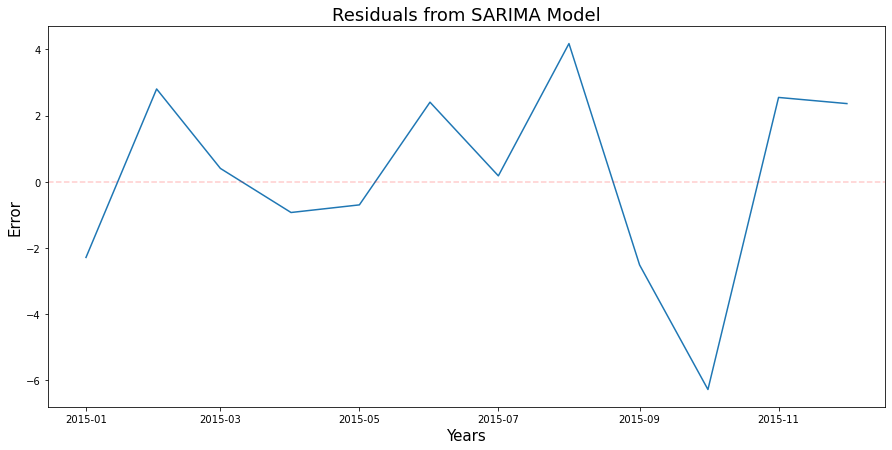

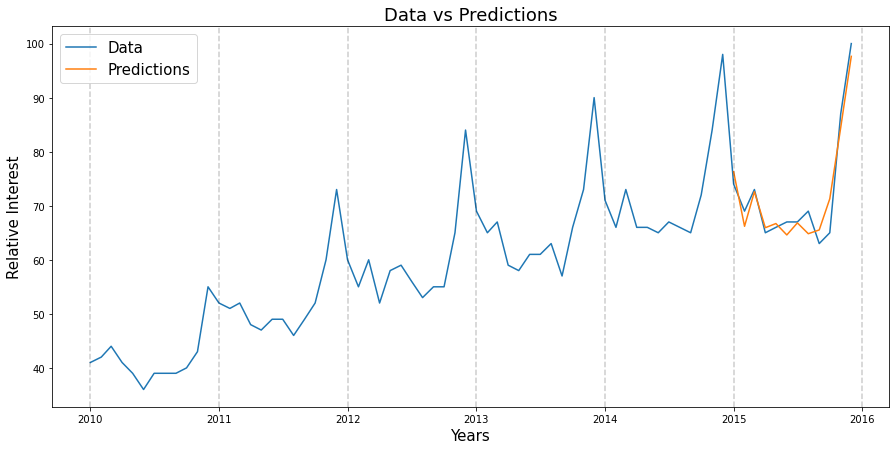

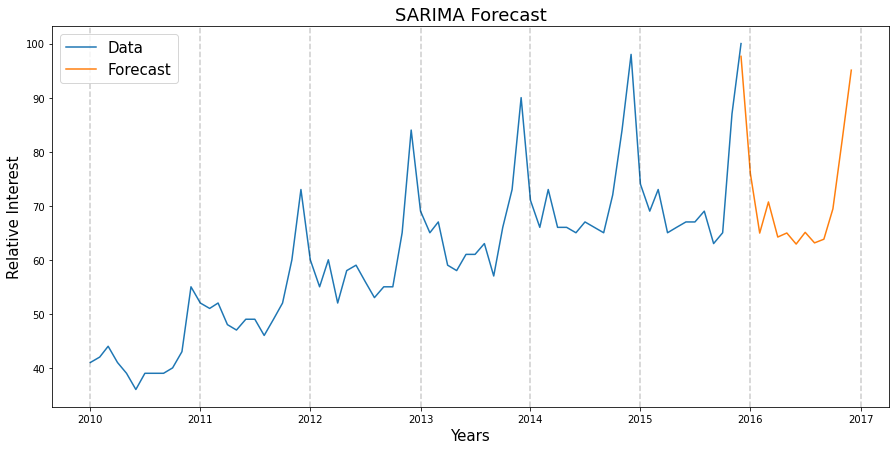

In [84]:
#M is no of months in the year
#p=0, d=0, q=2, P= 1, D= 0, Q= 1, M=12 
sarima_model(df_whiskey, 0,0,2,1,0,1,12)

C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JARVIS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 0.2928340435028076
                                        SARIMAX Results                                        
Dep. Variable:                       Relative Interest   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -134.296
Date:                                 Mon, 07 Nov 2022   AIC                            276.593
Time:                                         11:50:21   BIC                            283.993
Sample:                                     01-01-2010   HQIC                           279.377
                                          - 12-01-2014                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4442      0.148   

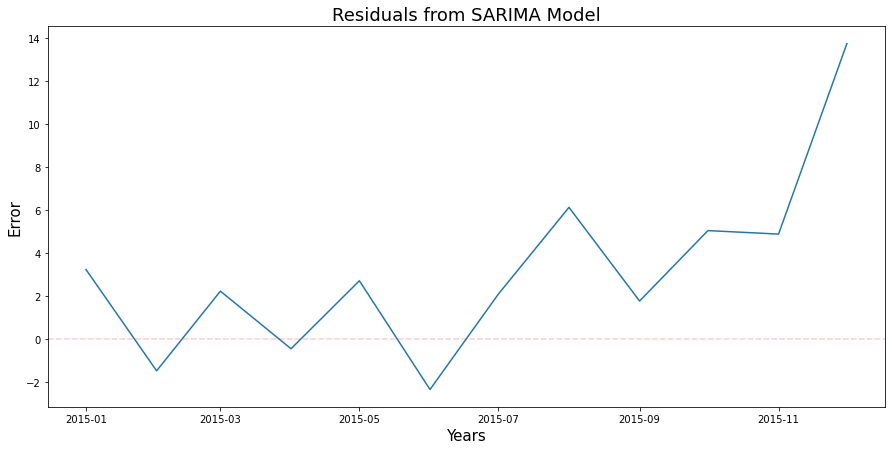

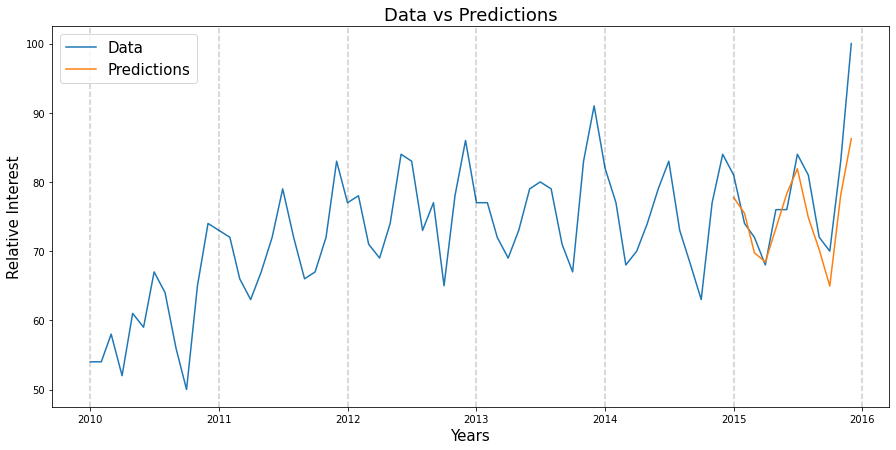

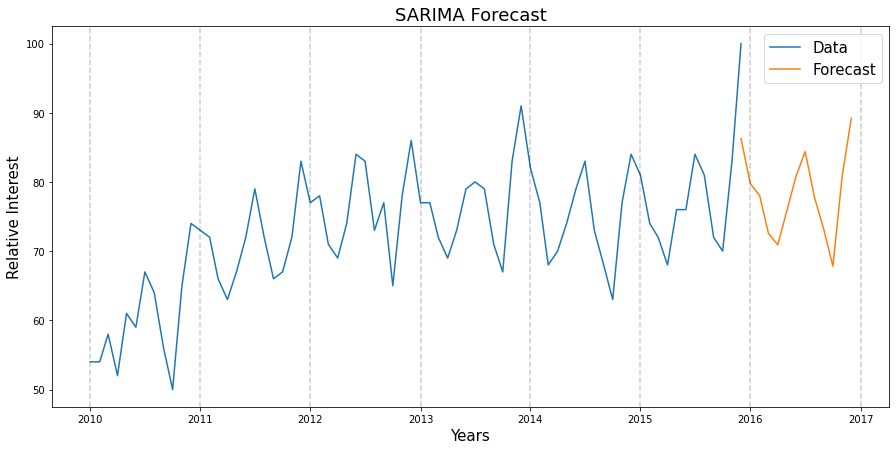

In [85]:
#M is no of months in the year
#p=1, d=1, q=0, P= 0, D= 1, Q= 2, M=12
sarima_model(df_whitewine,1,1,0,0,1,2,12)

### How would Google Trends data translate into better managerial and marketing decisions?

**Assumption:** 
* Since Skyrose Marketing Agency is a marketing company, it works for its clients during their sales(uptrend) period.
* All staff of all departments work together on its client

In [86]:
#Create datapoints
company_data= [['N/A', 
               'Downtown Brew', 'Downtown Brew', 'Downtown Brew', 
               'Downtown Brew, Vintage Vino', 'Downtown Brew, Vintage Vino', 'Vintage Vino',
               'Vintage Vino', 'VACATION TIME', 'On the Rocks Whiskey', 
               'On the Rocks Whiskey, Vintage Vino', 'On the Rocks Whiskey, Vintage Vino, Downtown Brew', 'On the Rocks Whiskey, Vintage Vino, Downtown Brew'
              ]]
#Index Name
company_index= ['Company']

company_df= pd.DataFrame(data= company_data, index= company_index, columns= df_emp.columns)
df_emp= pd.concat([df_emp, company_df])

In [87]:
df_emp

nan,Position,January,February,March,April,May,June,July,August,September,October,November,December
Employee,Position,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours,Available Hours
Cynthia Wright,Vice-president,168,160,176,176,160,176,176,160,168,176,168,168
Stephanie Williams,Creative,168,160,176,176,160,176,176,160,168,176,168,168
Raj \nDewan,Creative,168,160,176,176,160,176,176,160,168,176,168,168
Chris \nZhou,Technical,168,160,176,176,160,176,176,160,168,176,168,168
Nicola Mancini,Technical,168,160,176,176,160,176,176,160,168,176,168,168
Days Available,NaN,21,20,22,22,20,22,22,20,21,22,21,21
Company,N/A,Downtown Brew,Downtown Brew,Downtown Brew,"Downtown Brew, Vintage Vino","Downtown Brew, Vintage Vino",Vintage Vino,Vintage Vino,VACATION TIME,On the Rocks Whiskey,"On the Rocks Whiskey, Vintage Vino","On the Rocks Whiskey, Vintage Vino, Downtown Brew","On the Rocks Whiskey, Vintage Vino, Downtown Brew"
